In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train,ny_train),(x_test,ny_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
ny_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
ny_test.shape

(10000,)

In [9]:
image_pixels=x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(x_train.shape[0],image_pixels)
x_test=x_test.reshape(x_test.shape[0],image_pixels)

In [10]:
x_train.shape

(60000, 784)

# T-SNE 

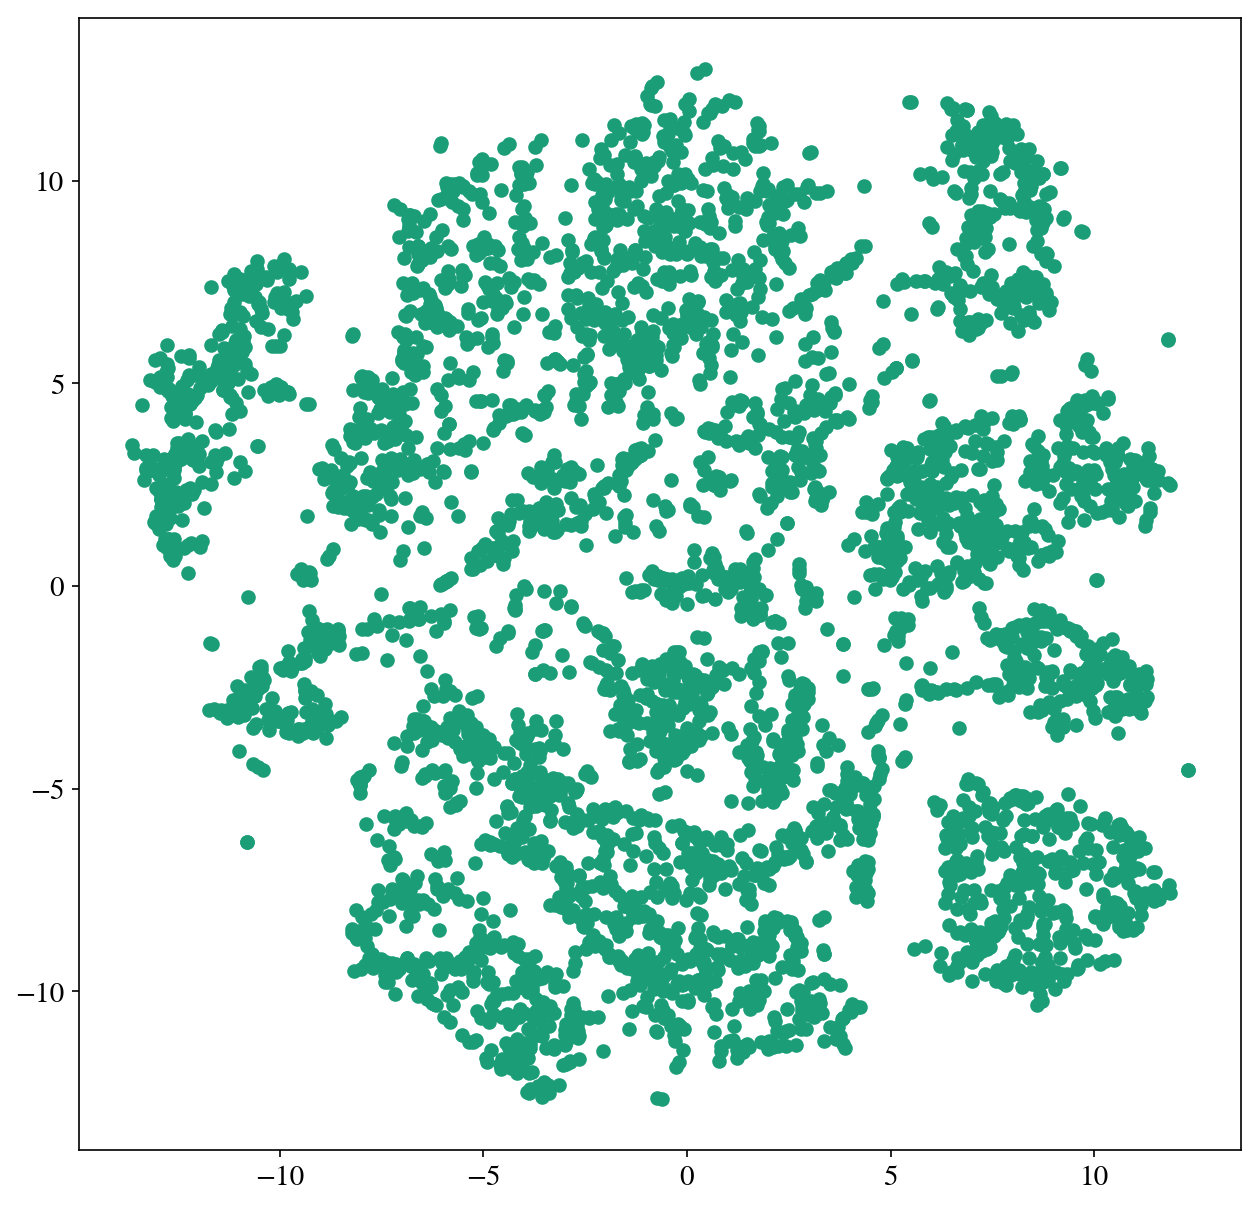

In [11]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(x_train[0:60000])
x_emb=pd.DataFrame(X_embedded)
plt.figure(figsize=(10,10))
plt.scatter(x_emb[0],x_emb[1])

In [13]:
x_test.shape

(10000, 784)

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(ny_train)
y_test=np_utils.to_categorical(ny_test)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_test.shape

(10000, 10)

In [18]:
#making a validation set
val_train=x_train[40000:]
x_train=x_train[0:40000]
val_test=y_train[40000:]
y_train=y_train[0:40000]

In [19]:
num_classes=10

# Baseline model of simple ANN 

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [21]:
model = Sequential()
model.add(Dense(784, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, validation_data=(val_train, val_test), epochs=6, batch_size=100, verbose=1)

Train on 40000 samples, validate on 20000 samples
Epoch 1/6
40000/40000 [==============================] - 11s - loss: 0.2766 - acc: 0.9209 - val_loss: 0.1653 - val_acc: 0.9510
Epoch 2/6
40000/40000 [==============================] - 10s - loss: 0.1100 - acc: 0.9669 - val_loss: 0.1164 - val_acc: 0.9649
Epoch 3/6
40000/40000 [==============================] - 10s - loss: 0.0694 - acc: 0.9800 - val_loss: 0.1012 - val_acc: 0.9704
Epoch 4/6
40000/40000 [==============================] - 10s - loss: 0.0460 - acc: 0.9863 - val_loss: 0.0972 - val_acc: 0.9696
Epoch 5/6
40000/40000 [==============================] - 10s - loss: 0.0318 - acc: 0.9910 - val_loss: 0.0895 - val_acc: 0.9726
Epoch 6/6
40000/40000 [==============================] - 10s - loss: 0.0233 - acc: 0.9935 - val_loss: 0.0902 - val_acc: 0.9737


In [23]:
scores=model.evaluate(x_test,y_test,verbose=1)

 9952/10000 [============================>.] - ETA: 0s

In [24]:
print "loss ", scores[0]
print "accuracy ", scores[1]

loss  0.0715290525578
accuracy  0.9791


 9504/10000 [===========================>..] - ETA: 0s('number of wrong predictions', 209)


(0.0, 1.0, 0.0, 1.0)

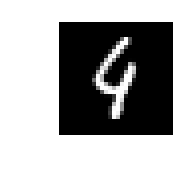

(0.0, 1.0, 0.0, 1.0)

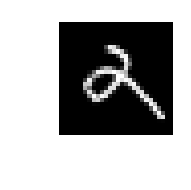

(0.0, 1.0, 0.0, 1.0)

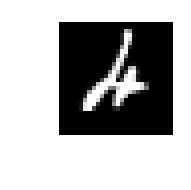

(0.0, 1.0, 0.0, 1.0)

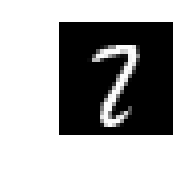

(0.0, 1.0, 0.0, 1.0)

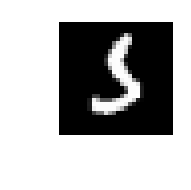

(0.0, 1.0, 0.0, 1.0)

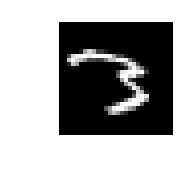

(0.0, 1.0, 0.0, 1.0)

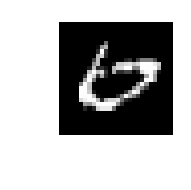

(0.0, 1.0, 0.0, 1.0)

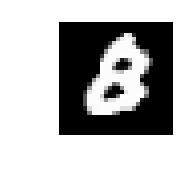

(0.0, 1.0, 0.0, 1.0)

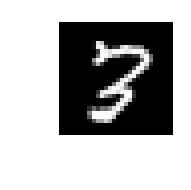

(0.0, 1.0, 0.0, 1.0)

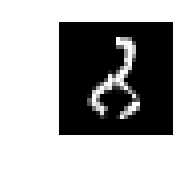

(0.0, 1.0, 0.0, 1.0)

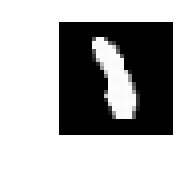

(0.0, 1.0, 0.0, 1.0)

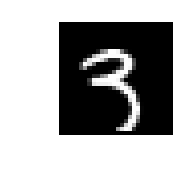

(0.0, 1.0, 0.0, 1.0)

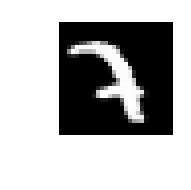

(0.0, 1.0, 0.0, 1.0)

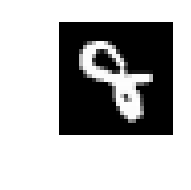

(0.0, 1.0, 0.0, 1.0)

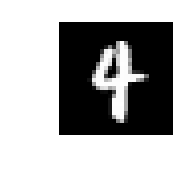

(0.0, 1.0, 0.0, 1.0)

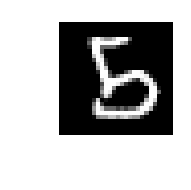

(0.0, 1.0, 0.0, 1.0)

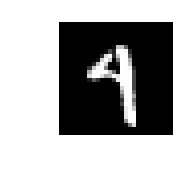

(0.0, 1.0, 0.0, 1.0)

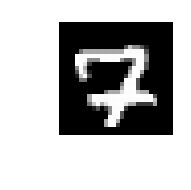

(0.0, 1.0, 0.0, 1.0)

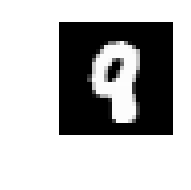

(0.0, 1.0, 0.0, 1.0)

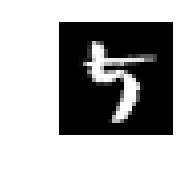

(0.0, 1.0, 0.0, 1.0)

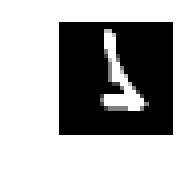

(0.0, 1.0, 0.0, 1.0)

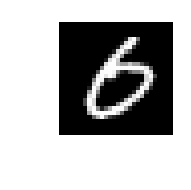

(0.0, 1.0, 0.0, 1.0)

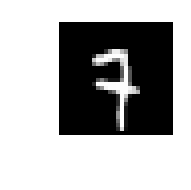

(0.0, 1.0, 0.0, 1.0)

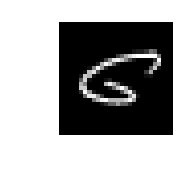

(0.0, 1.0, 0.0, 1.0)

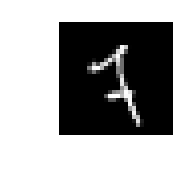

(0.0, 1.0, 0.0, 1.0)

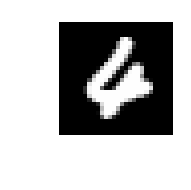

(0.0, 1.0, 0.0, 1.0)

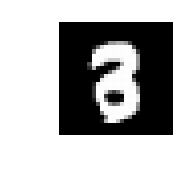

(0.0, 1.0, 0.0, 1.0)

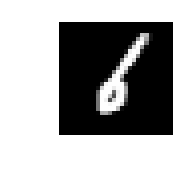

(0.0, 1.0, 0.0, 1.0)

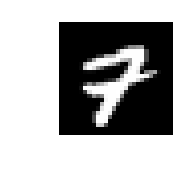

(0.0, 1.0, 0.0, 1.0)

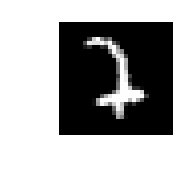

(0.0, 1.0, 0.0, 1.0)

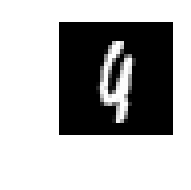

(0.0, 1.0, 0.0, 1.0)

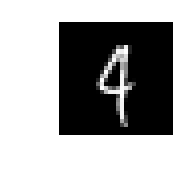

(0.0, 1.0, 0.0, 1.0)

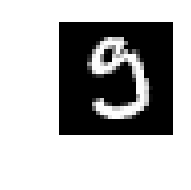

(0.0, 1.0, 0.0, 1.0)

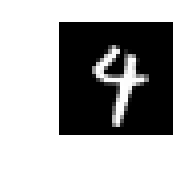

(0.0, 1.0, 0.0, 1.0)

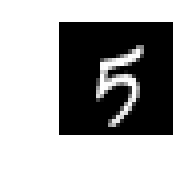

(0.0, 1.0, 0.0, 1.0)

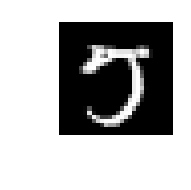

(0.0, 1.0, 0.0, 1.0)

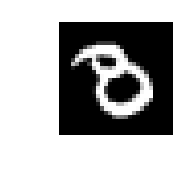

(0.0, 1.0, 0.0, 1.0)

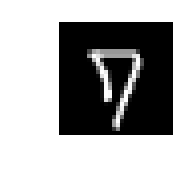

(0.0, 1.0, 0.0, 1.0)

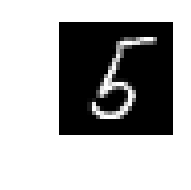

(0.0, 1.0, 0.0, 1.0)

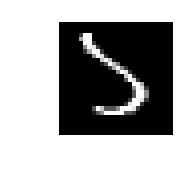

(0.0, 1.0, 0.0, 1.0)

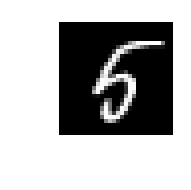

(0.0, 1.0, 0.0, 1.0)

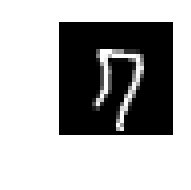

(0.0, 1.0, 0.0, 1.0)

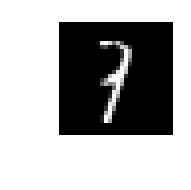

(0.0, 1.0, 0.0, 1.0)

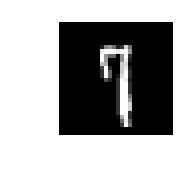

(0.0, 1.0, 0.0, 1.0)

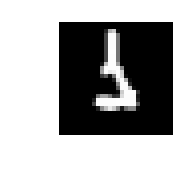

(0.0, 1.0, 0.0, 1.0)

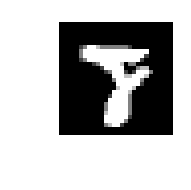

(0.0, 1.0, 0.0, 1.0)

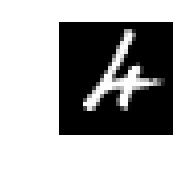

(0.0, 1.0, 0.0, 1.0)

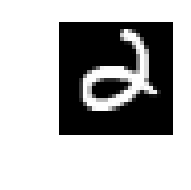

(0.0, 1.0, 0.0, 1.0)

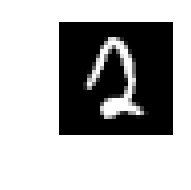

(0.0, 1.0, 0.0, 1.0)

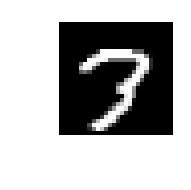

(0.0, 1.0, 0.0, 1.0)

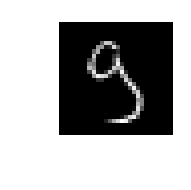

(0.0, 1.0, 0.0, 1.0)

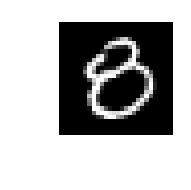

(0.0, 1.0, 0.0, 1.0)

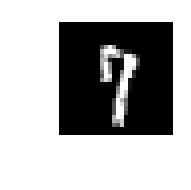

(0.0, 1.0, 0.0, 1.0)

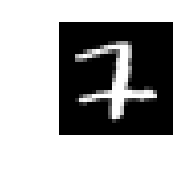

(0.0, 1.0, 0.0, 1.0)

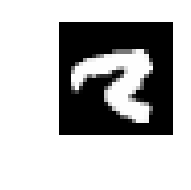

(0.0, 1.0, 0.0, 1.0)

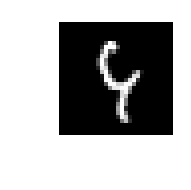

(0.0, 1.0, 0.0, 1.0)

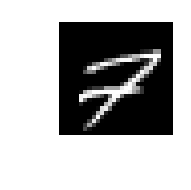

(0.0, 1.0, 0.0, 1.0)

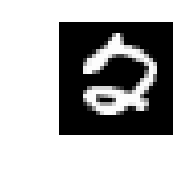

(0.0, 1.0, 0.0, 1.0)

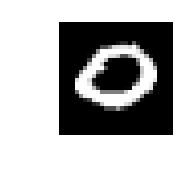

(0.0, 1.0, 0.0, 1.0)

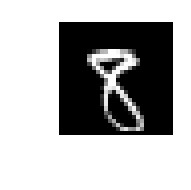

(0.0, 1.0, 0.0, 1.0)

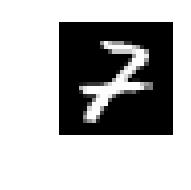

(0.0, 1.0, 0.0, 1.0)

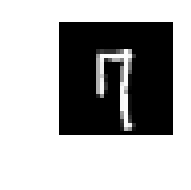

(0.0, 1.0, 0.0, 1.0)

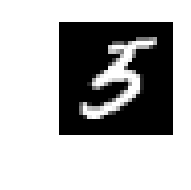

(0.0, 1.0, 0.0, 1.0)

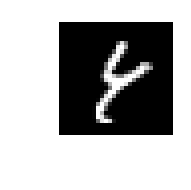

(0.0, 1.0, 0.0, 1.0)

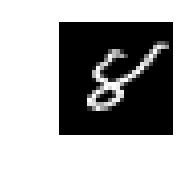

(0.0, 1.0, 0.0, 1.0)

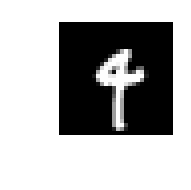

(0.0, 1.0, 0.0, 1.0)

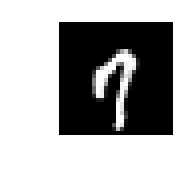

(0.0, 1.0, 0.0, 1.0)

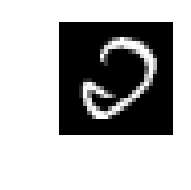

(0.0, 1.0, 0.0, 1.0)

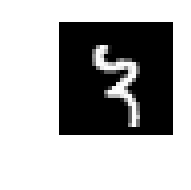

(0.0, 1.0, 0.0, 1.0)

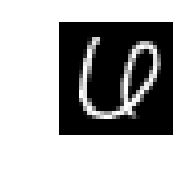

(0.0, 1.0, 0.0, 1.0)

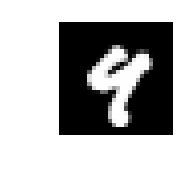

(0.0, 1.0, 0.0, 1.0)

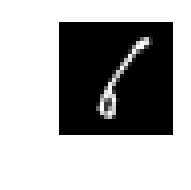

(0.0, 1.0, 0.0, 1.0)

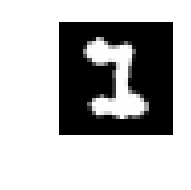

(0.0, 1.0, 0.0, 1.0)

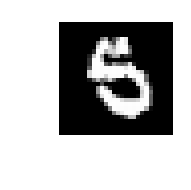

(0.0, 1.0, 0.0, 1.0)

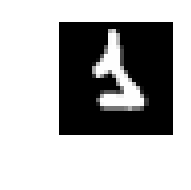

(0.0, 1.0, 0.0, 1.0)

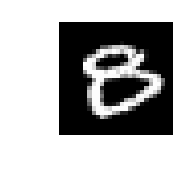

(0.0, 1.0, 0.0, 1.0)

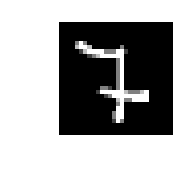

(0.0, 1.0, 0.0, 1.0)

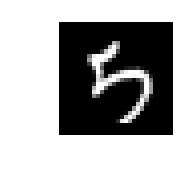

(0.0, 1.0, 0.0, 1.0)

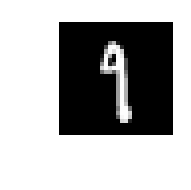

(0.0, 1.0, 0.0, 1.0)

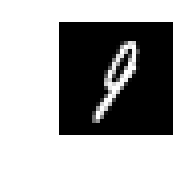

(0.0, 1.0, 0.0, 1.0)

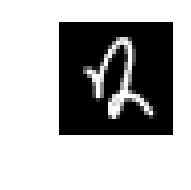

(0.0, 1.0, 0.0, 1.0)

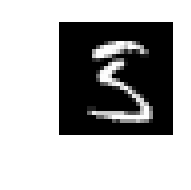

(0.0, 1.0, 0.0, 1.0)

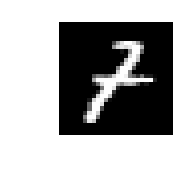

(0.0, 1.0, 0.0, 1.0)

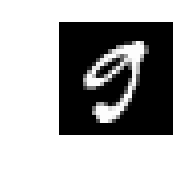

(0.0, 1.0, 0.0, 1.0)

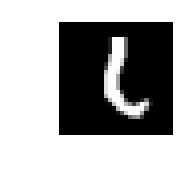

(0.0, 1.0, 0.0, 1.0)

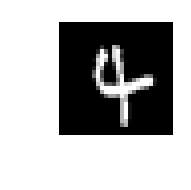

(0.0, 1.0, 0.0, 1.0)

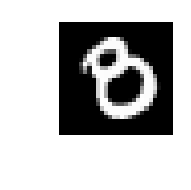

(0.0, 1.0, 0.0, 1.0)

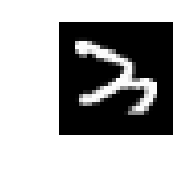

(0.0, 1.0, 0.0, 1.0)

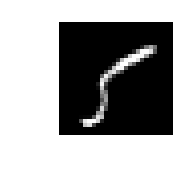

(0.0, 1.0, 0.0, 1.0)

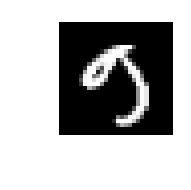

(0.0, 1.0, 0.0, 1.0)

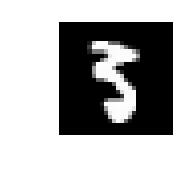

(0.0, 1.0, 0.0, 1.0)

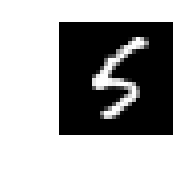

(0.0, 1.0, 0.0, 1.0)

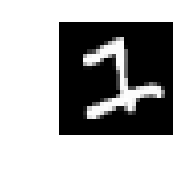

(0.0, 1.0, 0.0, 1.0)

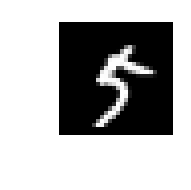

(0.0, 1.0, 0.0, 1.0)

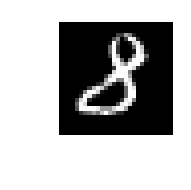

(0.0, 1.0, 0.0, 1.0)

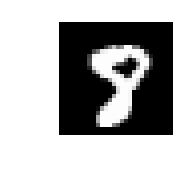

(0.0, 1.0, 0.0, 1.0)

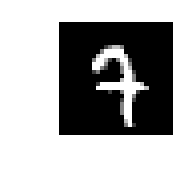

(0.0, 1.0, 0.0, 1.0)

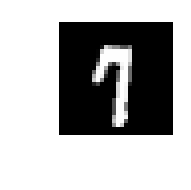

(0.0, 1.0, 0.0, 1.0)

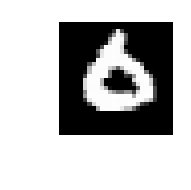

(0.0, 1.0, 0.0, 1.0)

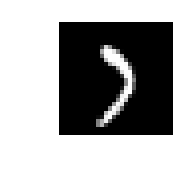

(0.0, 1.0, 0.0, 1.0)

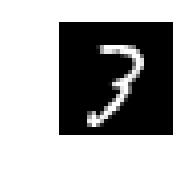

(0.0, 1.0, 0.0, 1.0)

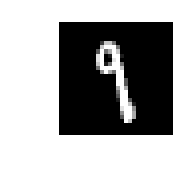

(0.0, 1.0, 0.0, 1.0)

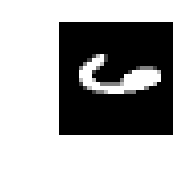

(0.0, 1.0, 0.0, 1.0)

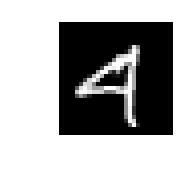

(0.0, 1.0, 0.0, 1.0)

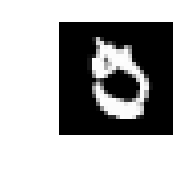

(0.0, 1.0, 0.0, 1.0)

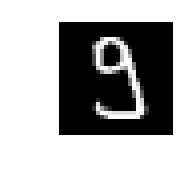

(0.0, 1.0, 0.0, 1.0)

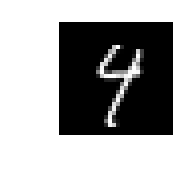

(0.0, 1.0, 0.0, 1.0)

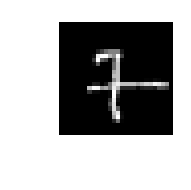

(0.0, 1.0, 0.0, 1.0)

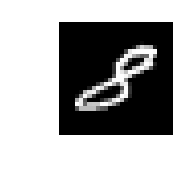

(0.0, 1.0, 0.0, 1.0)

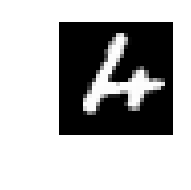

(0.0, 1.0, 0.0, 1.0)

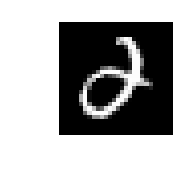

(0.0, 1.0, 0.0, 1.0)

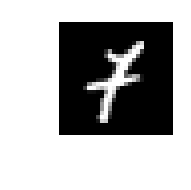

(0.0, 1.0, 0.0, 1.0)

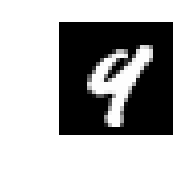

(0.0, 1.0, 0.0, 1.0)

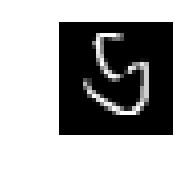

(0.0, 1.0, 0.0, 1.0)

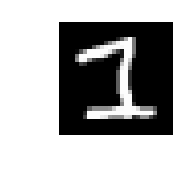

(0.0, 1.0, 0.0, 1.0)

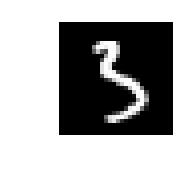

(0.0, 1.0, 0.0, 1.0)

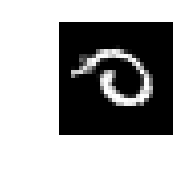

(0.0, 1.0, 0.0, 1.0)

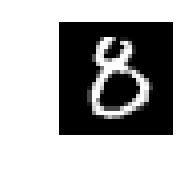

(0.0, 1.0, 0.0, 1.0)

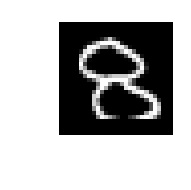

(0.0, 1.0, 0.0, 1.0)

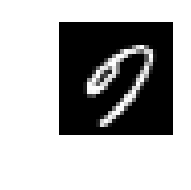

(0.0, 1.0, 0.0, 1.0)

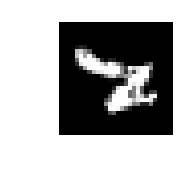

(0.0, 1.0, 0.0, 1.0)

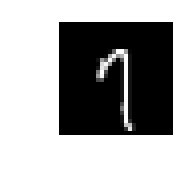

(0.0, 1.0, 0.0, 1.0)

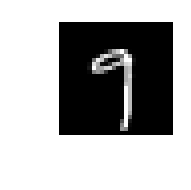

(0.0, 1.0, 0.0, 1.0)

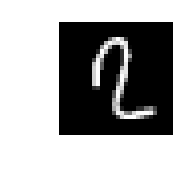

(0.0, 1.0, 0.0, 1.0)

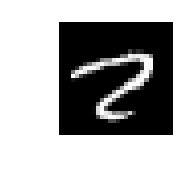

(0.0, 1.0, 0.0, 1.0)

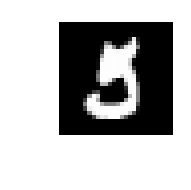

(0.0, 1.0, 0.0, 1.0)

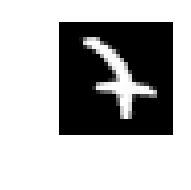

(0.0, 1.0, 0.0, 1.0)

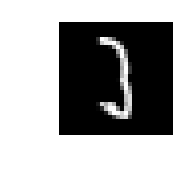

(0.0, 1.0, 0.0, 1.0)

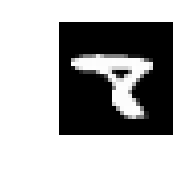

(0.0, 1.0, 0.0, 1.0)

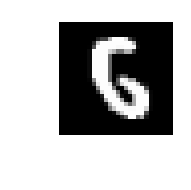

(0.0, 1.0, 0.0, 1.0)

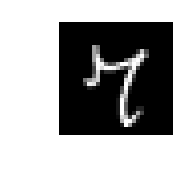

(0.0, 1.0, 0.0, 1.0)

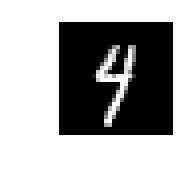

(0.0, 1.0, 0.0, 1.0)

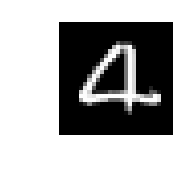

(0.0, 1.0, 0.0, 1.0)

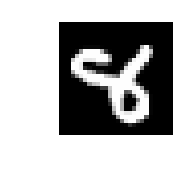

(0.0, 1.0, 0.0, 1.0)

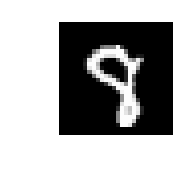

(0.0, 1.0, 0.0, 1.0)

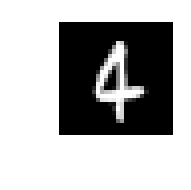

(0.0, 1.0, 0.0, 1.0)

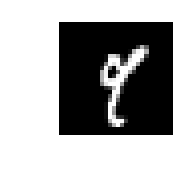

(0.0, 1.0, 0.0, 1.0)

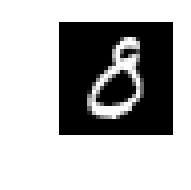

(0.0, 1.0, 0.0, 1.0)

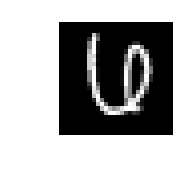

(0.0, 1.0, 0.0, 1.0)

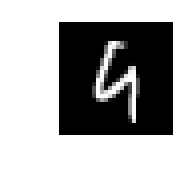

(0.0, 1.0, 0.0, 1.0)

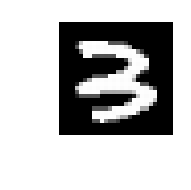

(0.0, 1.0, 0.0, 1.0)

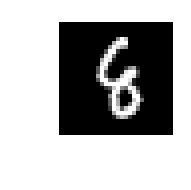

(0.0, 1.0, 0.0, 1.0)

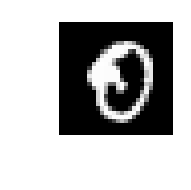

(0.0, 1.0, 0.0, 1.0)

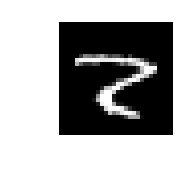

(0.0, 1.0, 0.0, 1.0)

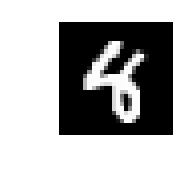

(0.0, 1.0, 0.0, 1.0)

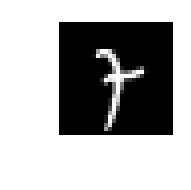

(0.0, 1.0, 0.0, 1.0)

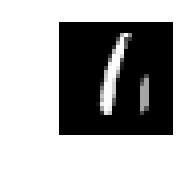

(0.0, 1.0, 0.0, 1.0)

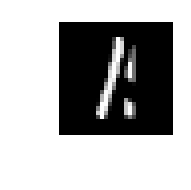

(0.0, 1.0, 0.0, 1.0)

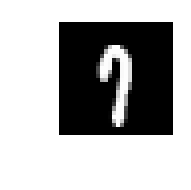

(0.0, 1.0, 0.0, 1.0)

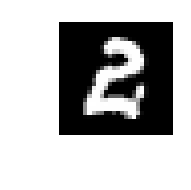

(0.0, 1.0, 0.0, 1.0)

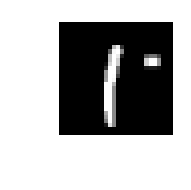

(0.0, 1.0, 0.0, 1.0)

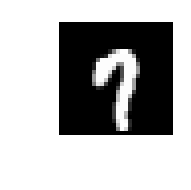

(0.0, 1.0, 0.0, 1.0)

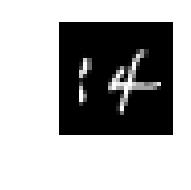

(0.0, 1.0, 0.0, 1.0)

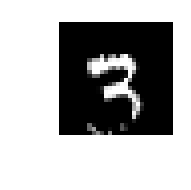

(0.0, 1.0, 0.0, 1.0)

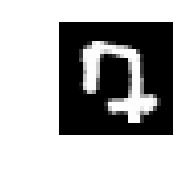

(0.0, 1.0, 0.0, 1.0)

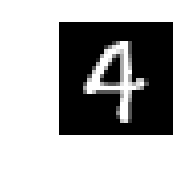

(0.0, 1.0, 0.0, 1.0)

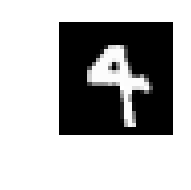

(0.0, 1.0, 0.0, 1.0)

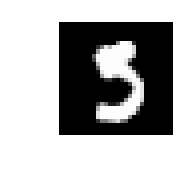

(0.0, 1.0, 0.0, 1.0)

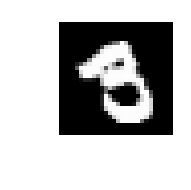

(0.0, 1.0, 0.0, 1.0)

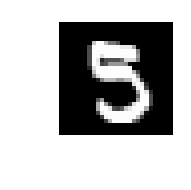

(0.0, 1.0, 0.0, 1.0)

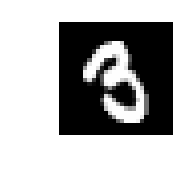

(0.0, 1.0, 0.0, 1.0)

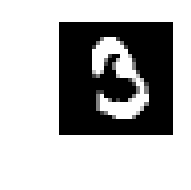

(0.0, 1.0, 0.0, 1.0)

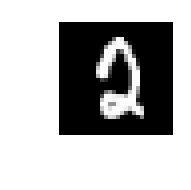

(0.0, 1.0, 0.0, 1.0)

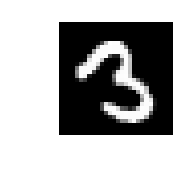

(0.0, 1.0, 0.0, 1.0)

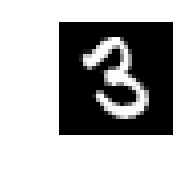

(0.0, 1.0, 0.0, 1.0)

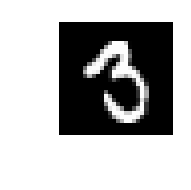

(0.0, 1.0, 0.0, 1.0)

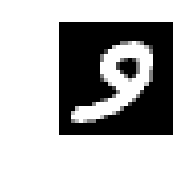

(0.0, 1.0, 0.0, 1.0)

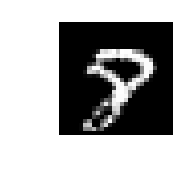

(0.0, 1.0, 0.0, 1.0)

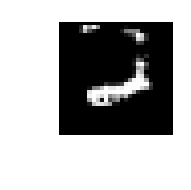

(0.0, 1.0, 0.0, 1.0)

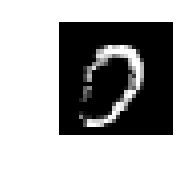

(0.0, 1.0, 0.0, 1.0)

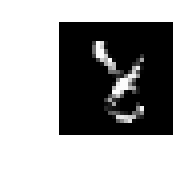

(0.0, 1.0, 0.0, 1.0)

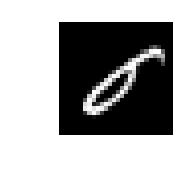

(0.0, 1.0, 0.0, 1.0)

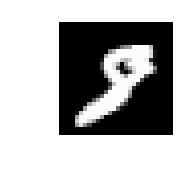

(0.0, 1.0, 0.0, 1.0)

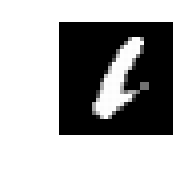

(0.0, 1.0, 0.0, 1.0)

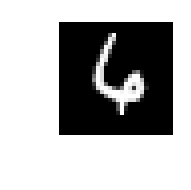

(0.0, 1.0, 0.0, 1.0)

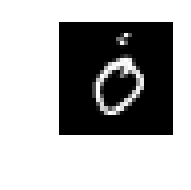

(0.0, 1.0, 0.0, 1.0)

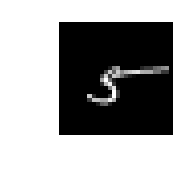

(0.0, 1.0, 0.0, 1.0)

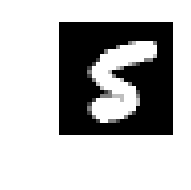

(0.0, 1.0, 0.0, 1.0)

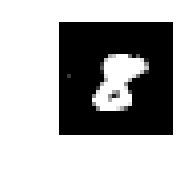

(0.0, 1.0, 0.0, 1.0)

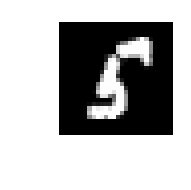

(0.0, 1.0, 0.0, 1.0)

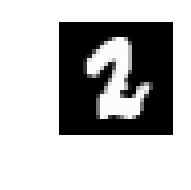

(0.0, 1.0, 0.0, 1.0)

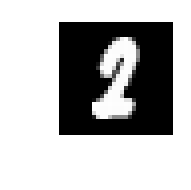

(0.0, 1.0, 0.0, 1.0)

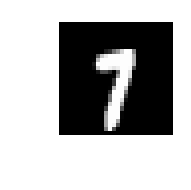

(0.0, 1.0, 0.0, 1.0)

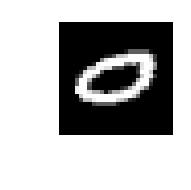

(0.0, 1.0, 0.0, 1.0)

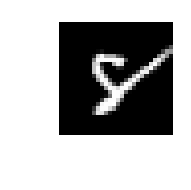

(0.0, 1.0, 0.0, 1.0)

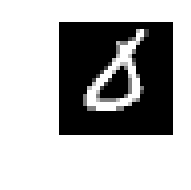

(0.0, 1.0, 0.0, 1.0)

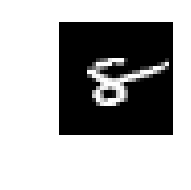

(0.0, 1.0, 0.0, 1.0)

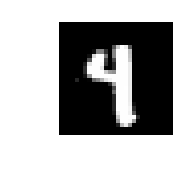

(0.0, 1.0, 0.0, 1.0)

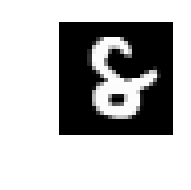

(0.0, 1.0, 0.0, 1.0)

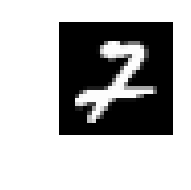

(0.0, 1.0, 0.0, 1.0)

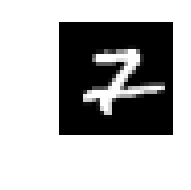

(0.0, 1.0, 0.0, 1.0)

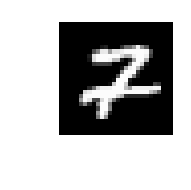

(0.0, 1.0, 0.0, 1.0)

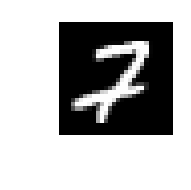

(0.0, 1.0, 0.0, 1.0)

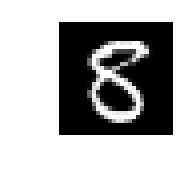

(0.0, 1.0, 0.0, 1.0)

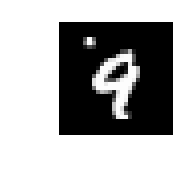

(0.0, 1.0, 0.0, 1.0)

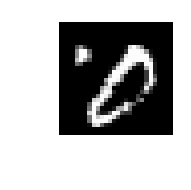

(0.0, 1.0, 0.0, 1.0)

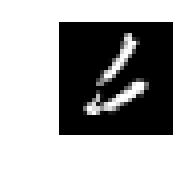

(0.0, 1.0, 0.0, 1.0)

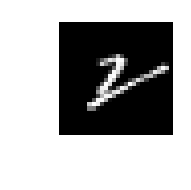

(0.0, 1.0, 0.0, 1.0)

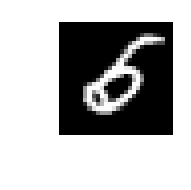

(0.0, 1.0, 0.0, 1.0)

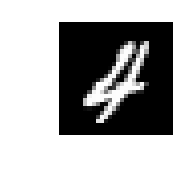

(0.0, 1.0, 0.0, 1.0)

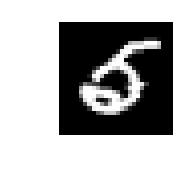

(0.0, 1.0, 0.0, 1.0)

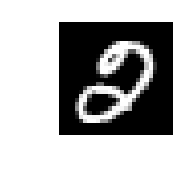

(0.0, 1.0, 0.0, 1.0)

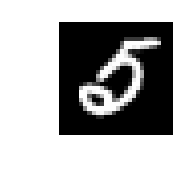

(0.0, 1.0, 0.0, 1.0)

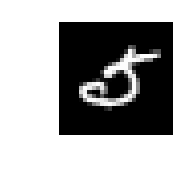

(0.0, 1.0, 0.0, 1.0)

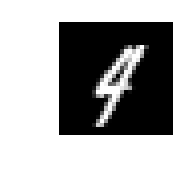

(0.0, 1.0, 0.0, 1.0)

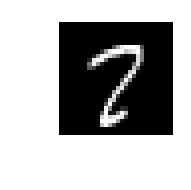

(0.0, 1.0, 0.0, 1.0)

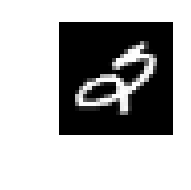

(0.0, 1.0, 0.0, 1.0)

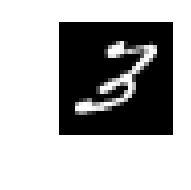

(0.0, 1.0, 0.0, 1.0)

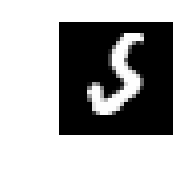

In [25]:
test_pred=model.predict_classes(x_test)
act_test_pred=ny_test
comp=list(test_pred==act_test_pred)
wrong_index=[i for i,x in enumerate(comp) if x==False]
wrong_pred=x_test[wrong_index]
print("number of wrong predictions",wrong_pred.shape[0])
for i in range(wrong_pred.shape[0]):
    x=wrong_pred[i]*255.0
    im=x.reshape(28,28)
    k=plt.figure(figsize=(1,1))
    k=plt.gray()
    plt.axis('off')
    k=plt.imshow(im,aspect=1)
    plt.show()

# Dropout for controlling overfitting

In [26]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(784, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, validation_data=(val_train, val_test), epochs=6, batch_size=100, verbose=1)

Train on 40000 samples, validate on 20000 samples
Epoch 1/6
40000/40000 [==============================] - 11s - loss: 0.3415 - acc: 0.9003 - val_loss: 0.1690 - val_acc: 0.9508
Epoch 2/6
40000/40000 [==============================] - 10s - loss: 0.1561 - acc: 0.9553 - val_loss: 0.1296 - val_acc: 0.9628
Epoch 3/6
40000/40000 [==============================] - 10s - loss: 0.1157 - acc: 0.9655 - val_loss: 0.1100 - val_acc: 0.9672
Epoch 4/6
40000/40000 [==============================] - 10s - loss: 0.0909 - acc: 0.9727 - val_loss: 0.0985 - val_acc: 0.9707
Epoch 5/6
40000/40000 [==============================] - 10s - loss: 0.0766 - acc: 0.9763 - val_loss: 0.0966 - val_acc: 0.9719
Epoch 6/6
40000/40000 [==============================] - 11s - loss: 0.0654 - acc: 0.9803 - val_loss: 0.0889 - val_acc: 0.9727


In [28]:
scores=model.evaluate(x_test,y_test,verbose=1)
print ""
print "loss ", scores[0]
print "accuracy ", scores[1]

 9888/10000 [============================>.] - ETA: 0s
loss  0.0778171791151
accuracy  0.9767


 9920/10000 [============================>.] - ETA: 0s('number of wrong predictions', 233)


(0.0, 1.0, 0.0, 1.0)

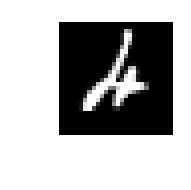

(0.0, 1.0, 0.0, 1.0)

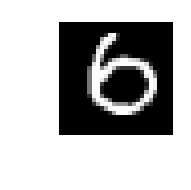

(0.0, 1.0, 0.0, 1.0)

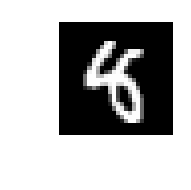

(0.0, 1.0, 0.0, 1.0)

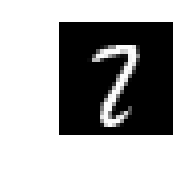

(0.0, 1.0, 0.0, 1.0)

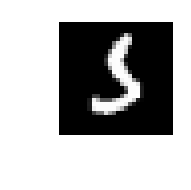

(0.0, 1.0, 0.0, 1.0)

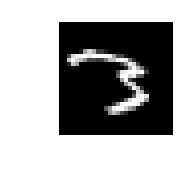

(0.0, 1.0, 0.0, 1.0)

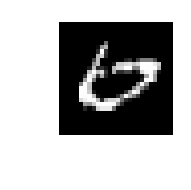

(0.0, 1.0, 0.0, 1.0)

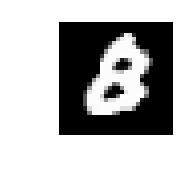

(0.0, 1.0, 0.0, 1.0)

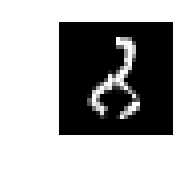

(0.0, 1.0, 0.0, 1.0)

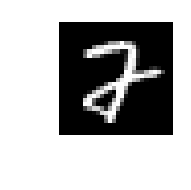

(0.0, 1.0, 0.0, 1.0)

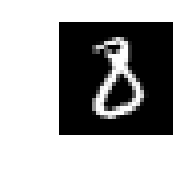

(0.0, 1.0, 0.0, 1.0)

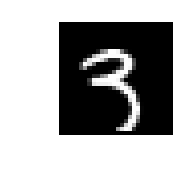

(0.0, 1.0, 0.0, 1.0)

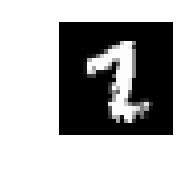

(0.0, 1.0, 0.0, 1.0)

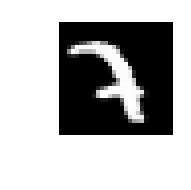

(0.0, 1.0, 0.0, 1.0)

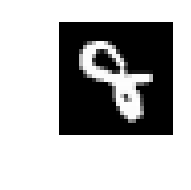

(0.0, 1.0, 0.0, 1.0)

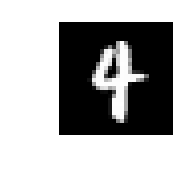

(0.0, 1.0, 0.0, 1.0)

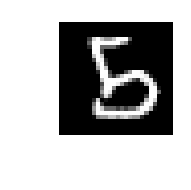

(0.0, 1.0, 0.0, 1.0)

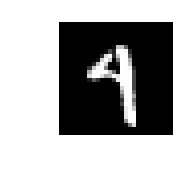

(0.0, 1.0, 0.0, 1.0)

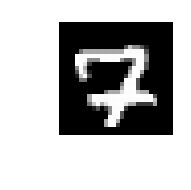

(0.0, 1.0, 0.0, 1.0)

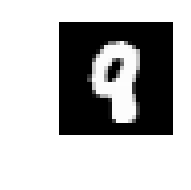

(0.0, 1.0, 0.0, 1.0)

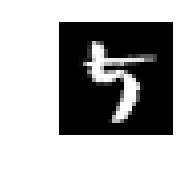

(0.0, 1.0, 0.0, 1.0)

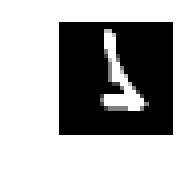

(0.0, 1.0, 0.0, 1.0)

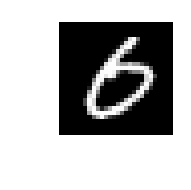

(0.0, 1.0, 0.0, 1.0)

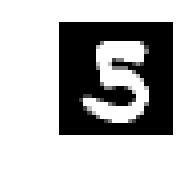

(0.0, 1.0, 0.0, 1.0)

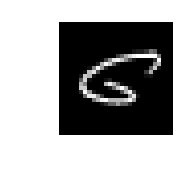

(0.0, 1.0, 0.0, 1.0)

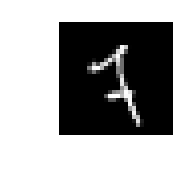

(0.0, 1.0, 0.0, 1.0)

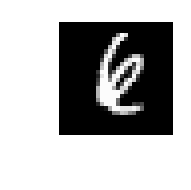

(0.0, 1.0, 0.0, 1.0)

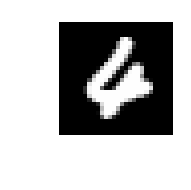

(0.0, 1.0, 0.0, 1.0)

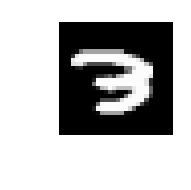

(0.0, 1.0, 0.0, 1.0)

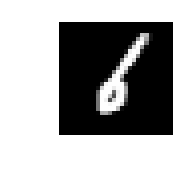

(0.0, 1.0, 0.0, 1.0)

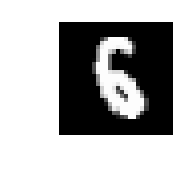

(0.0, 1.0, 0.0, 1.0)

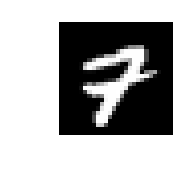

(0.0, 1.0, 0.0, 1.0)

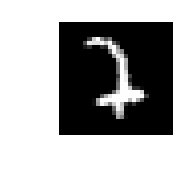

(0.0, 1.0, 0.0, 1.0)

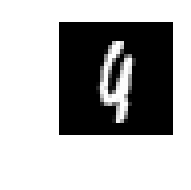

(0.0, 1.0, 0.0, 1.0)

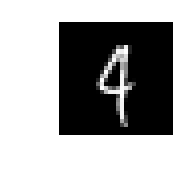

(0.0, 1.0, 0.0, 1.0)

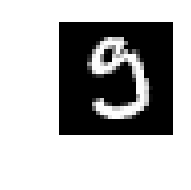

(0.0, 1.0, 0.0, 1.0)

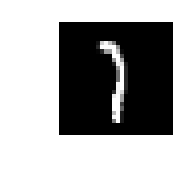

(0.0, 1.0, 0.0, 1.0)

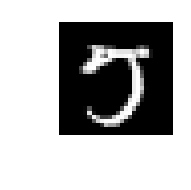

(0.0, 1.0, 0.0, 1.0)

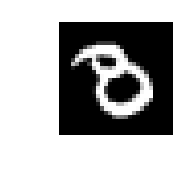

(0.0, 1.0, 0.0, 1.0)

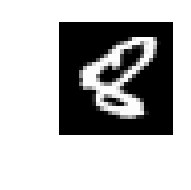

(0.0, 1.0, 0.0, 1.0)

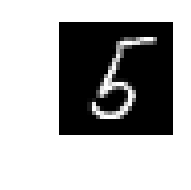

(0.0, 1.0, 0.0, 1.0)

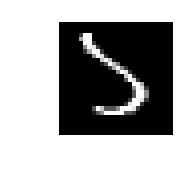

(0.0, 1.0, 0.0, 1.0)

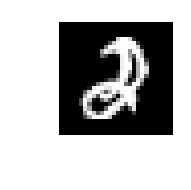

(0.0, 1.0, 0.0, 1.0)

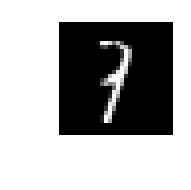

(0.0, 1.0, 0.0, 1.0)

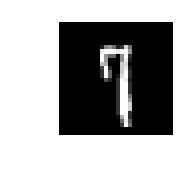

(0.0, 1.0, 0.0, 1.0)

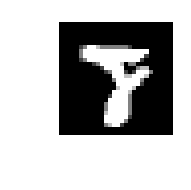

(0.0, 1.0, 0.0, 1.0)

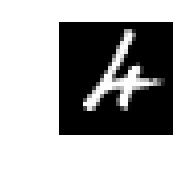

(0.0, 1.0, 0.0, 1.0)

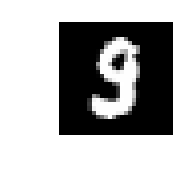

(0.0, 1.0, 0.0, 1.0)

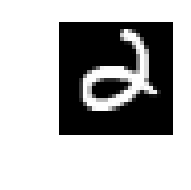

(0.0, 1.0, 0.0, 1.0)

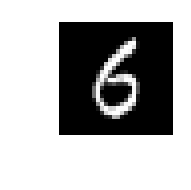

(0.0, 1.0, 0.0, 1.0)

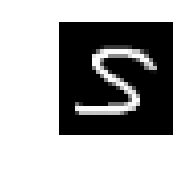

(0.0, 1.0, 0.0, 1.0)

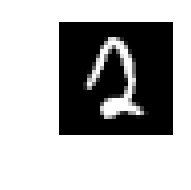

(0.0, 1.0, 0.0, 1.0)

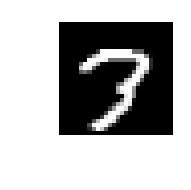

(0.0, 1.0, 0.0, 1.0)

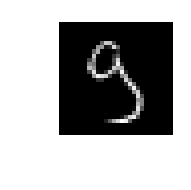

(0.0, 1.0, 0.0, 1.0)

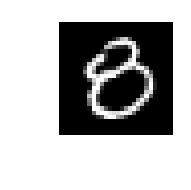

(0.0, 1.0, 0.0, 1.0)

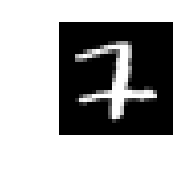

(0.0, 1.0, 0.0, 1.0)

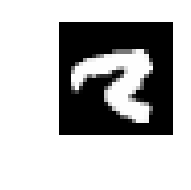

(0.0, 1.0, 0.0, 1.0)

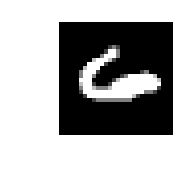

(0.0, 1.0, 0.0, 1.0)

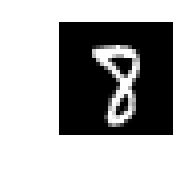

(0.0, 1.0, 0.0, 1.0)

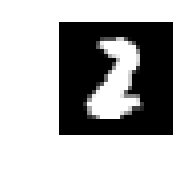

(0.0, 1.0, 0.0, 1.0)

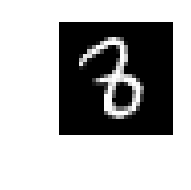

(0.0, 1.0, 0.0, 1.0)

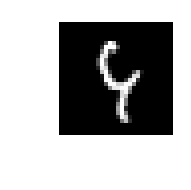

(0.0, 1.0, 0.0, 1.0)

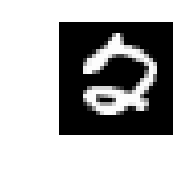

(0.0, 1.0, 0.0, 1.0)

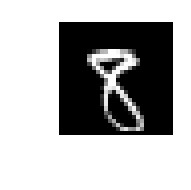

(0.0, 1.0, 0.0, 1.0)

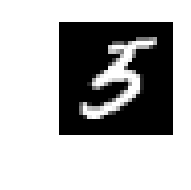

(0.0, 1.0, 0.0, 1.0)

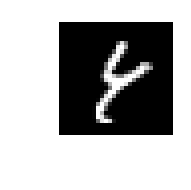

(0.0, 1.0, 0.0, 1.0)

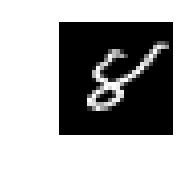

(0.0, 1.0, 0.0, 1.0)

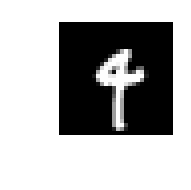

(0.0, 1.0, 0.0, 1.0)

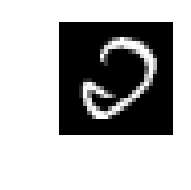

(0.0, 1.0, 0.0, 1.0)

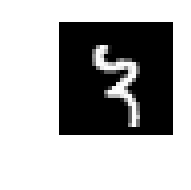

(0.0, 1.0, 0.0, 1.0)

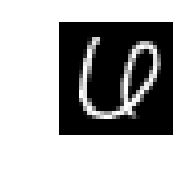

(0.0, 1.0, 0.0, 1.0)

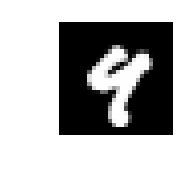

(0.0, 1.0, 0.0, 1.0)

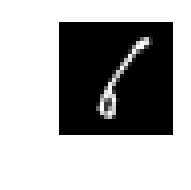

(0.0, 1.0, 0.0, 1.0)

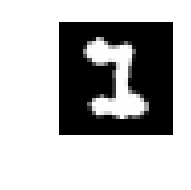

(0.0, 1.0, 0.0, 1.0)

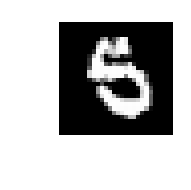

(0.0, 1.0, 0.0, 1.0)

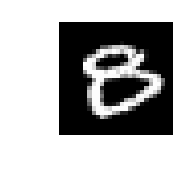

(0.0, 1.0, 0.0, 1.0)

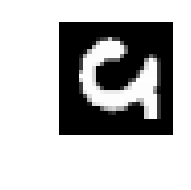

(0.0, 1.0, 0.0, 1.0)

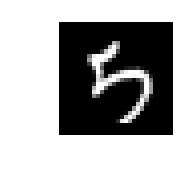

(0.0, 1.0, 0.0, 1.0)

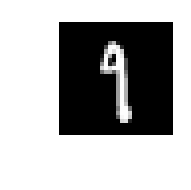

(0.0, 1.0, 0.0, 1.0)

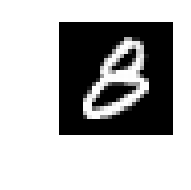

(0.0, 1.0, 0.0, 1.0)

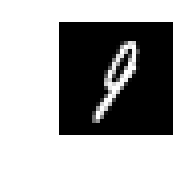

(0.0, 1.0, 0.0, 1.0)

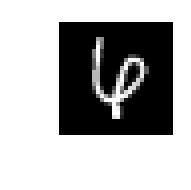

(0.0, 1.0, 0.0, 1.0)

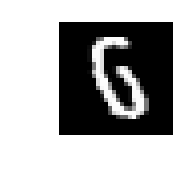

(0.0, 1.0, 0.0, 1.0)

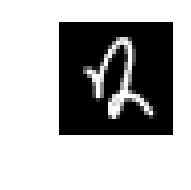

(0.0, 1.0, 0.0, 1.0)

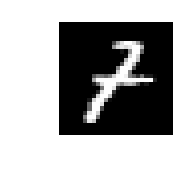

(0.0, 1.0, 0.0, 1.0)

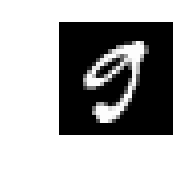

(0.0, 1.0, 0.0, 1.0)

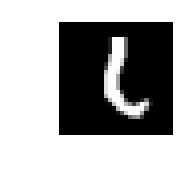

(0.0, 1.0, 0.0, 1.0)

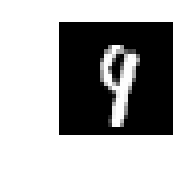

(0.0, 1.0, 0.0, 1.0)

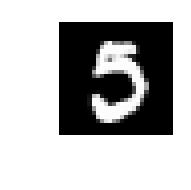

(0.0, 1.0, 0.0, 1.0)

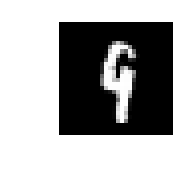

(0.0, 1.0, 0.0, 1.0)

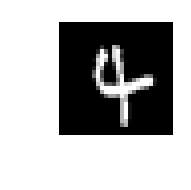

(0.0, 1.0, 0.0, 1.0)

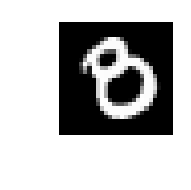

(0.0, 1.0, 0.0, 1.0)

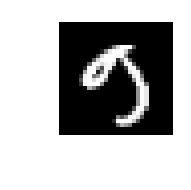

(0.0, 1.0, 0.0, 1.0)

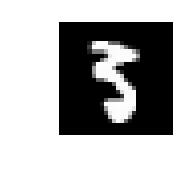

(0.0, 1.0, 0.0, 1.0)

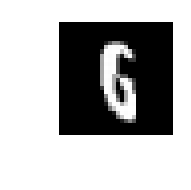

(0.0, 1.0, 0.0, 1.0)

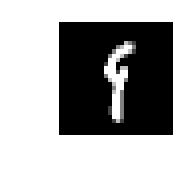

(0.0, 1.0, 0.0, 1.0)

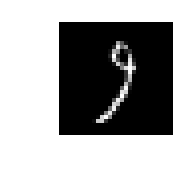

(0.0, 1.0, 0.0, 1.0)

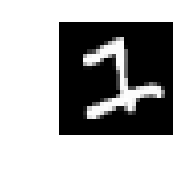

(0.0, 1.0, 0.0, 1.0)

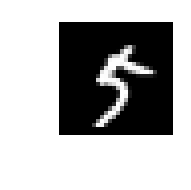

(0.0, 1.0, 0.0, 1.0)

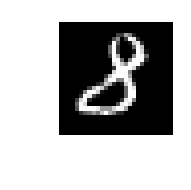

(0.0, 1.0, 0.0, 1.0)

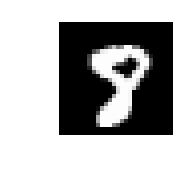

(0.0, 1.0, 0.0, 1.0)

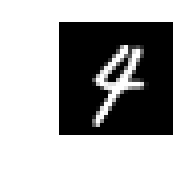

(0.0, 1.0, 0.0, 1.0)

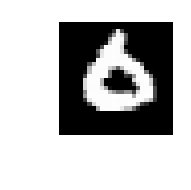

(0.0, 1.0, 0.0, 1.0)

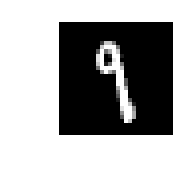

(0.0, 1.0, 0.0, 1.0)

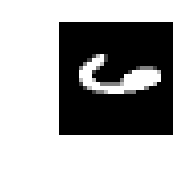

(0.0, 1.0, 0.0, 1.0)

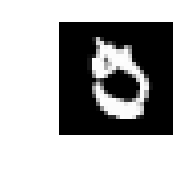

(0.0, 1.0, 0.0, 1.0)

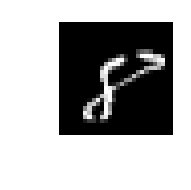

(0.0, 1.0, 0.0, 1.0)

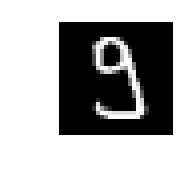

(0.0, 1.0, 0.0, 1.0)

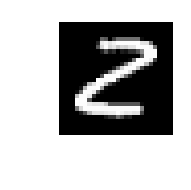

(0.0, 1.0, 0.0, 1.0)

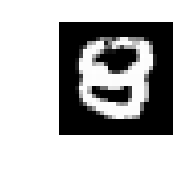

(0.0, 1.0, 0.0, 1.0)

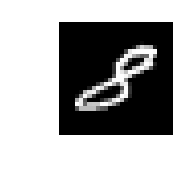

(0.0, 1.0, 0.0, 1.0)

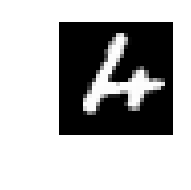

(0.0, 1.0, 0.0, 1.0)

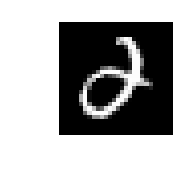

(0.0, 1.0, 0.0, 1.0)

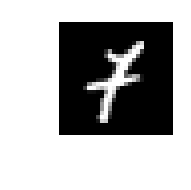

(0.0, 1.0, 0.0, 1.0)

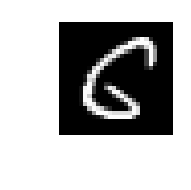

(0.0, 1.0, 0.0, 1.0)

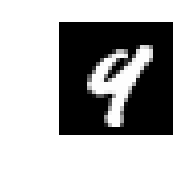

(0.0, 1.0, 0.0, 1.0)

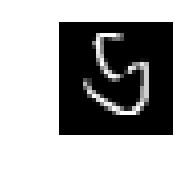

(0.0, 1.0, 0.0, 1.0)

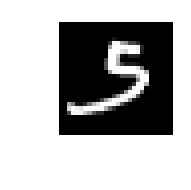

(0.0, 1.0, 0.0, 1.0)

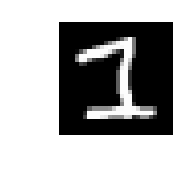

(0.0, 1.0, 0.0, 1.0)

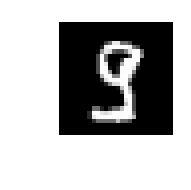

(0.0, 1.0, 0.0, 1.0)

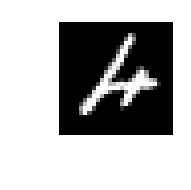

(0.0, 1.0, 0.0, 1.0)

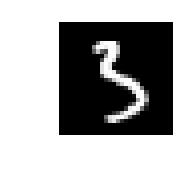

(0.0, 1.0, 0.0, 1.0)

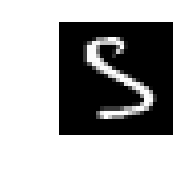

(0.0, 1.0, 0.0, 1.0)

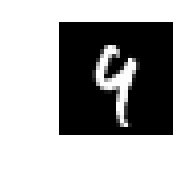

(0.0, 1.0, 0.0, 1.0)

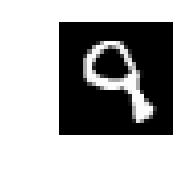

(0.0, 1.0, 0.0, 1.0)

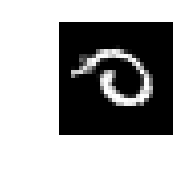

(0.0, 1.0, 0.0, 1.0)

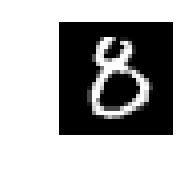

(0.0, 1.0, 0.0, 1.0)

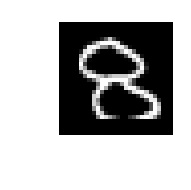

(0.0, 1.0, 0.0, 1.0)

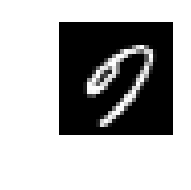

(0.0, 1.0, 0.0, 1.0)

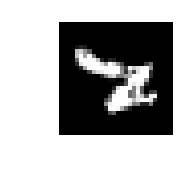

(0.0, 1.0, 0.0, 1.0)

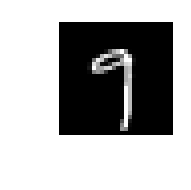

(0.0, 1.0, 0.0, 1.0)

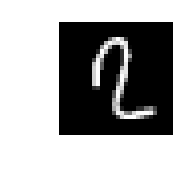

(0.0, 1.0, 0.0, 1.0)

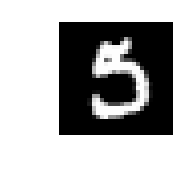

(0.0, 1.0, 0.0, 1.0)

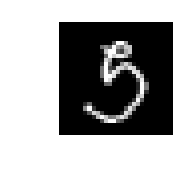

(0.0, 1.0, 0.0, 1.0)

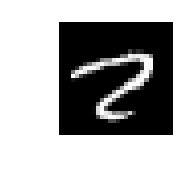

(0.0, 1.0, 0.0, 1.0)

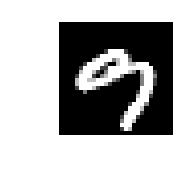

(0.0, 1.0, 0.0, 1.0)

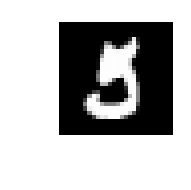

(0.0, 1.0, 0.0, 1.0)

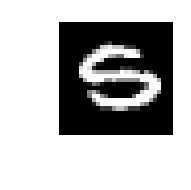

(0.0, 1.0, 0.0, 1.0)

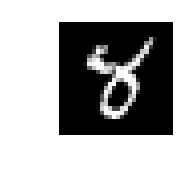

(0.0, 1.0, 0.0, 1.0)

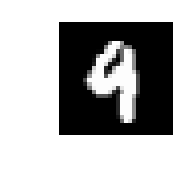

(0.0, 1.0, 0.0, 1.0)

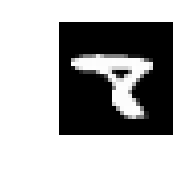

(0.0, 1.0, 0.0, 1.0)

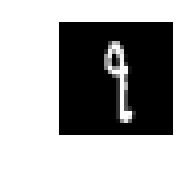

(0.0, 1.0, 0.0, 1.0)

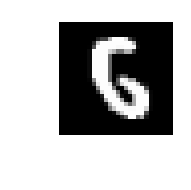

(0.0, 1.0, 0.0, 1.0)

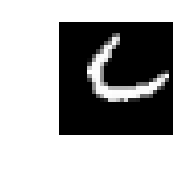

(0.0, 1.0, 0.0, 1.0)

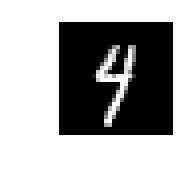

(0.0, 1.0, 0.0, 1.0)

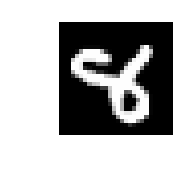

(0.0, 1.0, 0.0, 1.0)

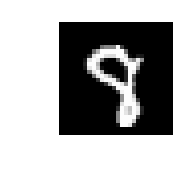

(0.0, 1.0, 0.0, 1.0)

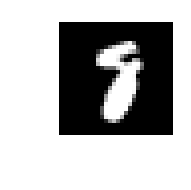

(0.0, 1.0, 0.0, 1.0)

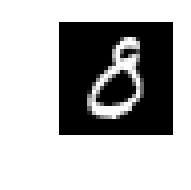

(0.0, 1.0, 0.0, 1.0)

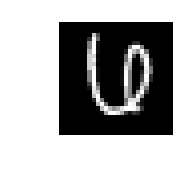

(0.0, 1.0, 0.0, 1.0)

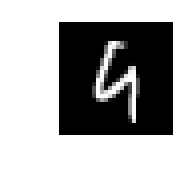

(0.0, 1.0, 0.0, 1.0)

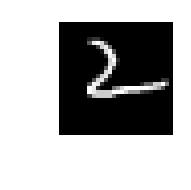

(0.0, 1.0, 0.0, 1.0)

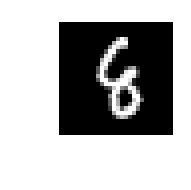

(0.0, 1.0, 0.0, 1.0)

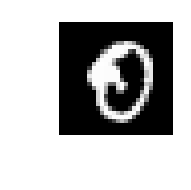

(0.0, 1.0, 0.0, 1.0)

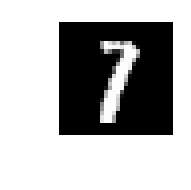

(0.0, 1.0, 0.0, 1.0)

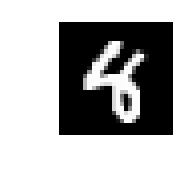

(0.0, 1.0, 0.0, 1.0)

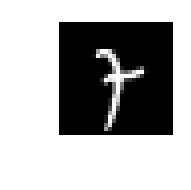

(0.0, 1.0, 0.0, 1.0)

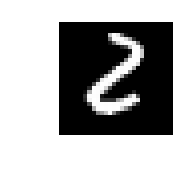

(0.0, 1.0, 0.0, 1.0)

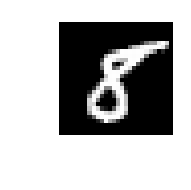

(0.0, 1.0, 0.0, 1.0)

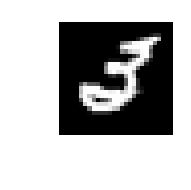

(0.0, 1.0, 0.0, 1.0)

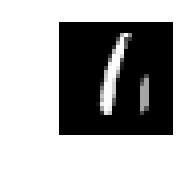

(0.0, 1.0, 0.0, 1.0)

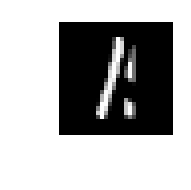

(0.0, 1.0, 0.0, 1.0)

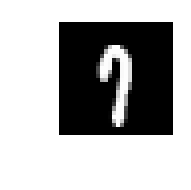

(0.0, 1.0, 0.0, 1.0)

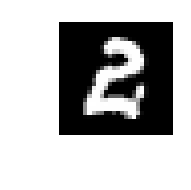

(0.0, 1.0, 0.0, 1.0)

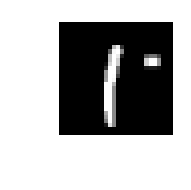

(0.0, 1.0, 0.0, 1.0)

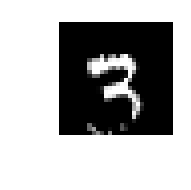

(0.0, 1.0, 0.0, 1.0)

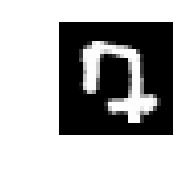

(0.0, 1.0, 0.0, 1.0)

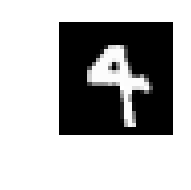

(0.0, 1.0, 0.0, 1.0)

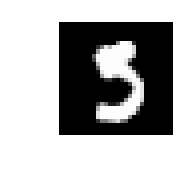

(0.0, 1.0, 0.0, 1.0)

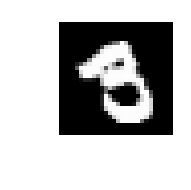

(0.0, 1.0, 0.0, 1.0)

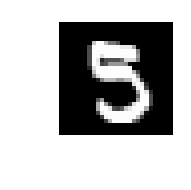

(0.0, 1.0, 0.0, 1.0)

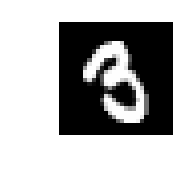

(0.0, 1.0, 0.0, 1.0)

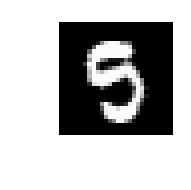

(0.0, 1.0, 0.0, 1.0)

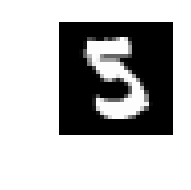

(0.0, 1.0, 0.0, 1.0)

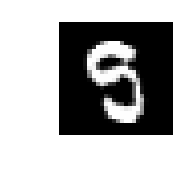

(0.0, 1.0, 0.0, 1.0)

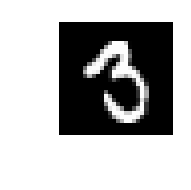

(0.0, 1.0, 0.0, 1.0)

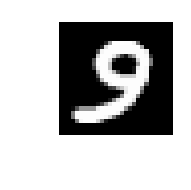

(0.0, 1.0, 0.0, 1.0)

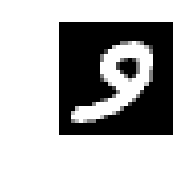

(0.0, 1.0, 0.0, 1.0)

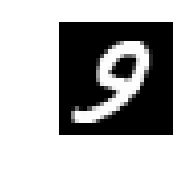

(0.0, 1.0, 0.0, 1.0)

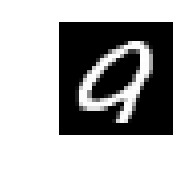

(0.0, 1.0, 0.0, 1.0)

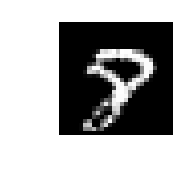

(0.0, 1.0, 0.0, 1.0)

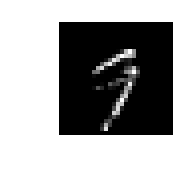

(0.0, 1.0, 0.0, 1.0)

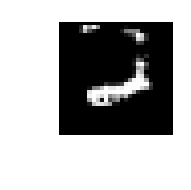

(0.0, 1.0, 0.0, 1.0)

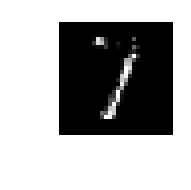

(0.0, 1.0, 0.0, 1.0)

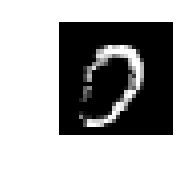

(0.0, 1.0, 0.0, 1.0)

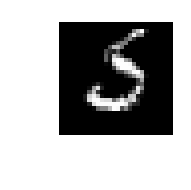

(0.0, 1.0, 0.0, 1.0)

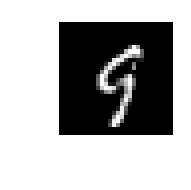

(0.0, 1.0, 0.0, 1.0)

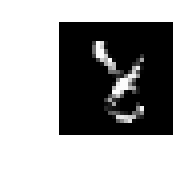

(0.0, 1.0, 0.0, 1.0)

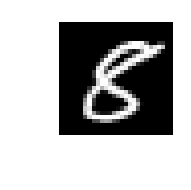

(0.0, 1.0, 0.0, 1.0)

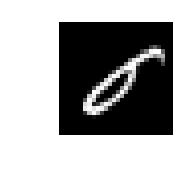

(0.0, 1.0, 0.0, 1.0)

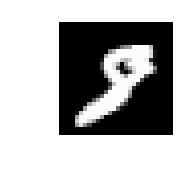

(0.0, 1.0, 0.0, 1.0)

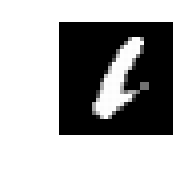

(0.0, 1.0, 0.0, 1.0)

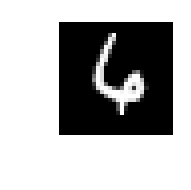

(0.0, 1.0, 0.0, 1.0)

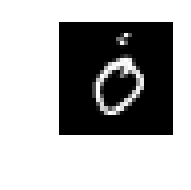

(0.0, 1.0, 0.0, 1.0)

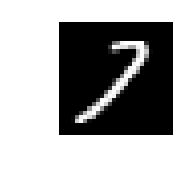

(0.0, 1.0, 0.0, 1.0)

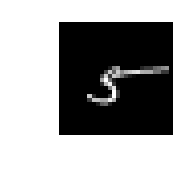

(0.0, 1.0, 0.0, 1.0)

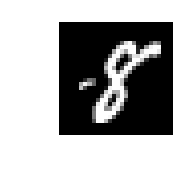

(0.0, 1.0, 0.0, 1.0)

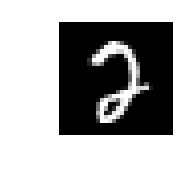

(0.0, 1.0, 0.0, 1.0)

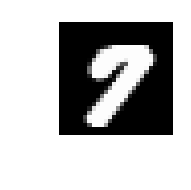

(0.0, 1.0, 0.0, 1.0)

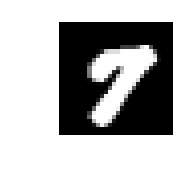

(0.0, 1.0, 0.0, 1.0)

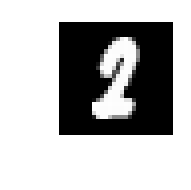

(0.0, 1.0, 0.0, 1.0)

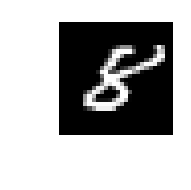

(0.0, 1.0, 0.0, 1.0)

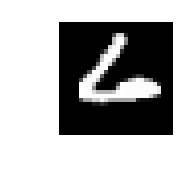

(0.0, 1.0, 0.0, 1.0)

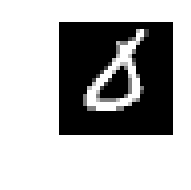

(0.0, 1.0, 0.0, 1.0)

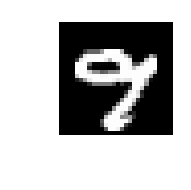

(0.0, 1.0, 0.0, 1.0)

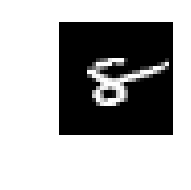

(0.0, 1.0, 0.0, 1.0)

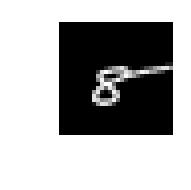

(0.0, 1.0, 0.0, 1.0)

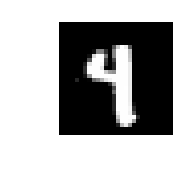

(0.0, 1.0, 0.0, 1.0)

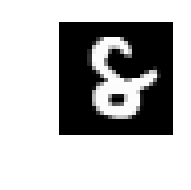

(0.0, 1.0, 0.0, 1.0)

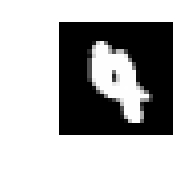

(0.0, 1.0, 0.0, 1.0)

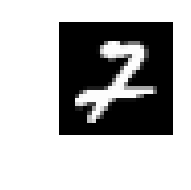

(0.0, 1.0, 0.0, 1.0)

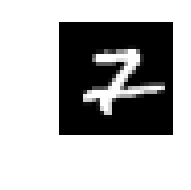

(0.0, 1.0, 0.0, 1.0)

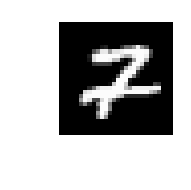

(0.0, 1.0, 0.0, 1.0)

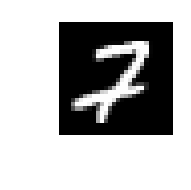

(0.0, 1.0, 0.0, 1.0)

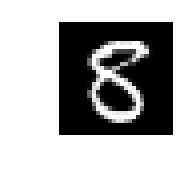

(0.0, 1.0, 0.0, 1.0)

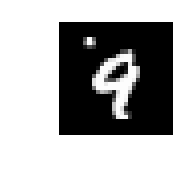

(0.0, 1.0, 0.0, 1.0)

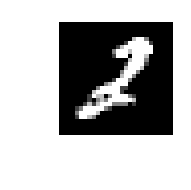

(0.0, 1.0, 0.0, 1.0)

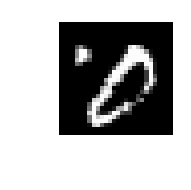

(0.0, 1.0, 0.0, 1.0)

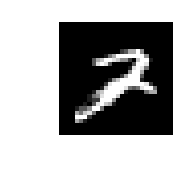

(0.0, 1.0, 0.0, 1.0)

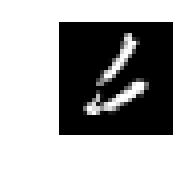

(0.0, 1.0, 0.0, 1.0)

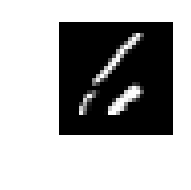

(0.0, 1.0, 0.0, 1.0)

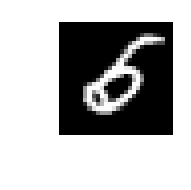

(0.0, 1.0, 0.0, 1.0)

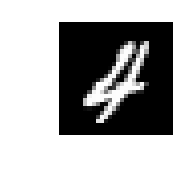

(0.0, 1.0, 0.0, 1.0)

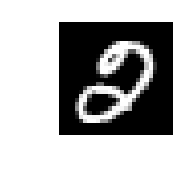

(0.0, 1.0, 0.0, 1.0)

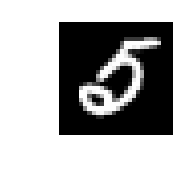

(0.0, 1.0, 0.0, 1.0)

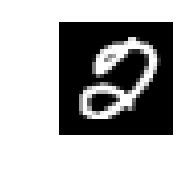

(0.0, 1.0, 0.0, 1.0)

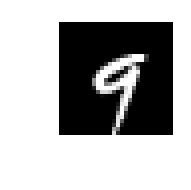

(0.0, 1.0, 0.0, 1.0)

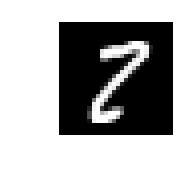

(0.0, 1.0, 0.0, 1.0)

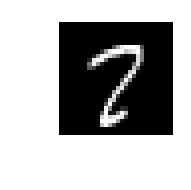

(0.0, 1.0, 0.0, 1.0)

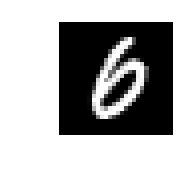

(0.0, 1.0, 0.0, 1.0)

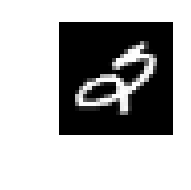

(0.0, 1.0, 0.0, 1.0)

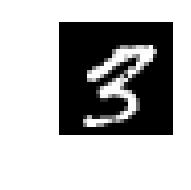

(0.0, 1.0, 0.0, 1.0)

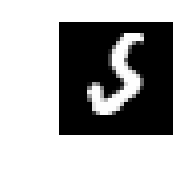

In [29]:
test_pred=model.predict_classes(x_test)
act_test_pred=ny_test
comp=list(test_pred==act_test_pred)
wrong_index=[i for i,x in enumerate(comp) if x==False]
wrong_pred=x_test[wrong_index]
print("number of wrong predictions",wrong_pred.shape[0])
for i in range(wrong_pred.shape[0]):
    x=wrong_pred[i]*255.0
    im=x.reshape(28,28)
    k=plt.figure(figsize=(1,1))
    k=plt.gray()
    plt.axis('off')
    k=plt.imshow(im,aspect=1)
    plt.show()

# Simple CNN

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train=x_train/255.0
x_test=x_test/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [32]:
#getting validation data
val_train=x_train[40000:]
x_train=x_train[:40000]
val_test=y_train[40000:]
y_train=y_train[:40000]

In [33]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout,Flatten

In [34]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
cnn_model.fit(x_train,y_train,validation_data=(val_train,val_test),epochs=10,batch_size=200,verbose=1)

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 33s - loss: 0.3376 - acc: 0.9007 - val_loss: 0.1240 - val_acc: 0.9642
Epoch 2/10
40000/40000 [==============================] - 33s - loss: 0.1119 - acc: 0.9668 - val_loss: 0.0793 - val_acc: 0.9759
Epoch 3/10
40000/40000 [==============================] - 33s - loss: 0.0816 - acc: 0.9748 - val_loss: 0.0662 - val_acc: 0.9800
Epoch 4/10
40000/40000 [==============================] - 33s - loss: 0.0634 - acc: 0.9803 - val_loss: 0.0640 - val_acc: 0.9800
Epoch 5/10
40000/40000 [==============================] - 33s - loss: 0.0543 - acc: 0.9835 - val_loss: 0.0602 - val_acc: 0.9813
Epoch 6/10
40000/40000 [==============================] - 33s - loss: 0.0448 - acc: 0.9867 - val_loss: 0.0516 - val_acc: 0.9838
Epoch 7/10
40000/40000 [==============================] - 33s - loss: 0.0386 - acc: 0.9870 - val_loss: 0.0489 - val_acc: 0.9854
Epoch 8/10
40000/40000 [==============================

In [36]:
cnn_model.evaluate(x_test,y_test)

 9856/10000 [============================>.] - ETA: 0s

[0.03902165622552857, 0.98770000000000002]

 9920/10000 [============================>.] - ETA: 0s('number of wrong predictions', 123)


(0.0, 1.0, 0.0, 1.0)

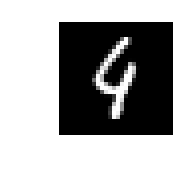

(0.0, 1.0, 0.0, 1.0)

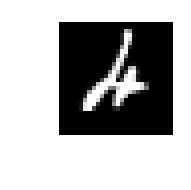

(0.0, 1.0, 0.0, 1.0)

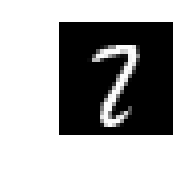

(0.0, 1.0, 0.0, 1.0)

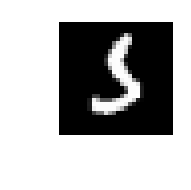

(0.0, 1.0, 0.0, 1.0)

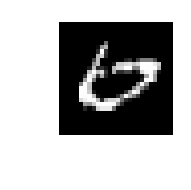

(0.0, 1.0, 0.0, 1.0)

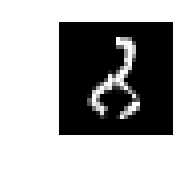

(0.0, 1.0, 0.0, 1.0)

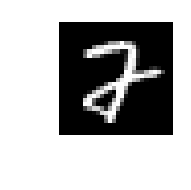

(0.0, 1.0, 0.0, 1.0)

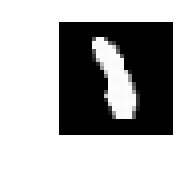

(0.0, 1.0, 0.0, 1.0)

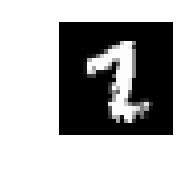

(0.0, 1.0, 0.0, 1.0)

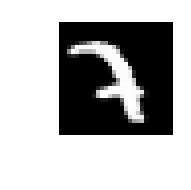

(0.0, 1.0, 0.0, 1.0)

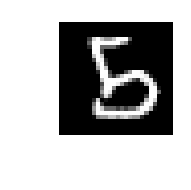

(0.0, 1.0, 0.0, 1.0)

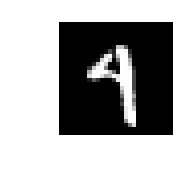

(0.0, 1.0, 0.0, 1.0)

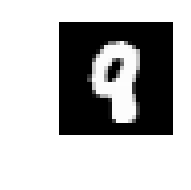

(0.0, 1.0, 0.0, 1.0)

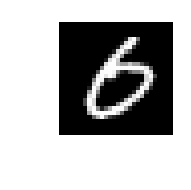

(0.0, 1.0, 0.0, 1.0)

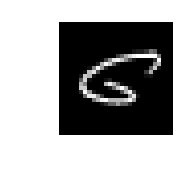

(0.0, 1.0, 0.0, 1.0)

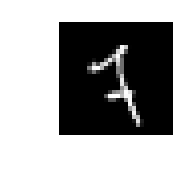

(0.0, 1.0, 0.0, 1.0)

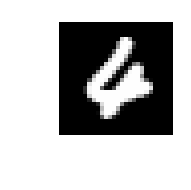

(0.0, 1.0, 0.0, 1.0)

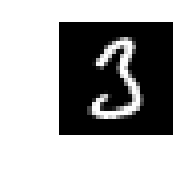

(0.0, 1.0, 0.0, 1.0)

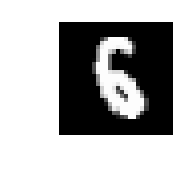

(0.0, 1.0, 0.0, 1.0)

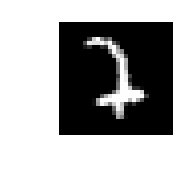

(0.0, 1.0, 0.0, 1.0)

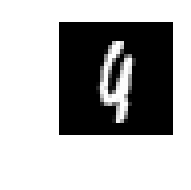

(0.0, 1.0, 0.0, 1.0)

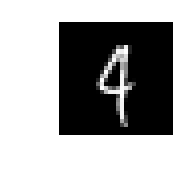

(0.0, 1.0, 0.0, 1.0)

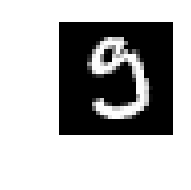

(0.0, 1.0, 0.0, 1.0)

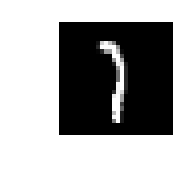

(0.0, 1.0, 0.0, 1.0)

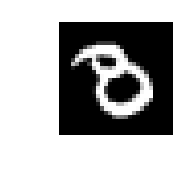

(0.0, 1.0, 0.0, 1.0)

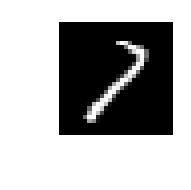

(0.0, 1.0, 0.0, 1.0)

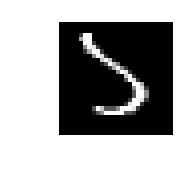

(0.0, 1.0, 0.0, 1.0)

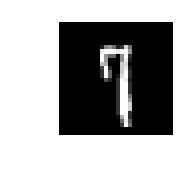

(0.0, 1.0, 0.0, 1.0)

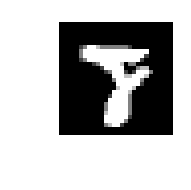

(0.0, 1.0, 0.0, 1.0)

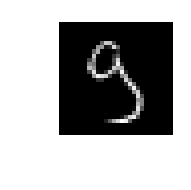

(0.0, 1.0, 0.0, 1.0)

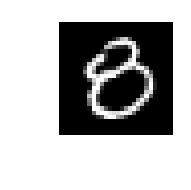

(0.0, 1.0, 0.0, 1.0)

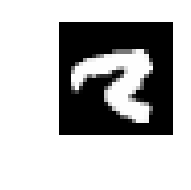

(0.0, 1.0, 0.0, 1.0)

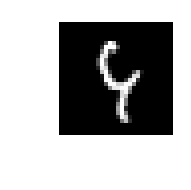

(0.0, 1.0, 0.0, 1.0)

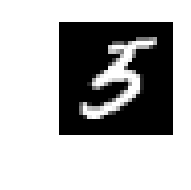

(0.0, 1.0, 0.0, 1.0)

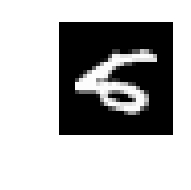

(0.0, 1.0, 0.0, 1.0)

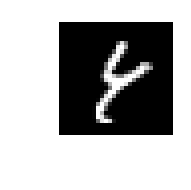

(0.0, 1.0, 0.0, 1.0)

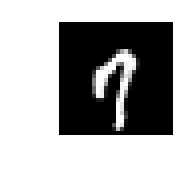

(0.0, 1.0, 0.0, 1.0)

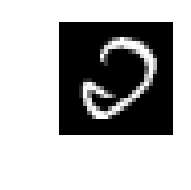

(0.0, 1.0, 0.0, 1.0)

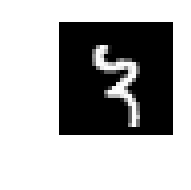

(0.0, 1.0, 0.0, 1.0)

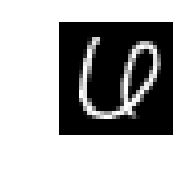

(0.0, 1.0, 0.0, 1.0)

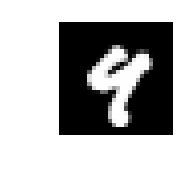

(0.0, 1.0, 0.0, 1.0)

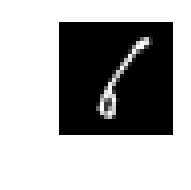

(0.0, 1.0, 0.0, 1.0)

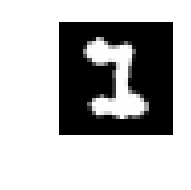

(0.0, 1.0, 0.0, 1.0)

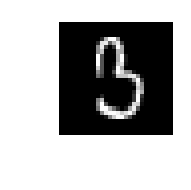

(0.0, 1.0, 0.0, 1.0)

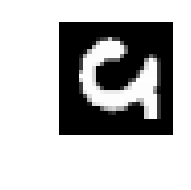

(0.0, 1.0, 0.0, 1.0)

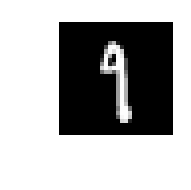

(0.0, 1.0, 0.0, 1.0)

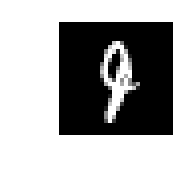

(0.0, 1.0, 0.0, 1.0)

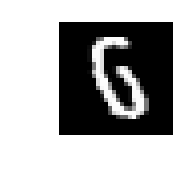

(0.0, 1.0, 0.0, 1.0)

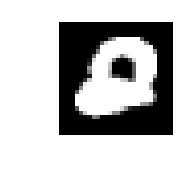

(0.0, 1.0, 0.0, 1.0)

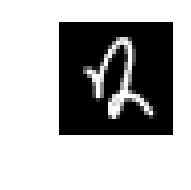

(0.0, 1.0, 0.0, 1.0)

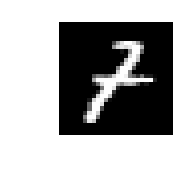

(0.0, 1.0, 0.0, 1.0)

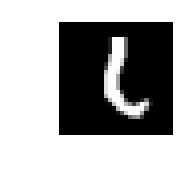

(0.0, 1.0, 0.0, 1.0)

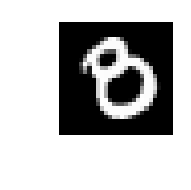

(0.0, 1.0, 0.0, 1.0)

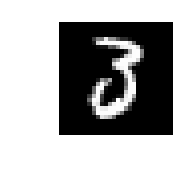

(0.0, 1.0, 0.0, 1.0)

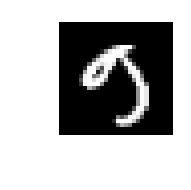

(0.0, 1.0, 0.0, 1.0)

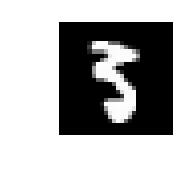

(0.0, 1.0, 0.0, 1.0)

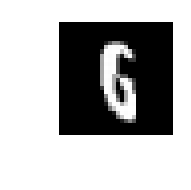

(0.0, 1.0, 0.0, 1.0)

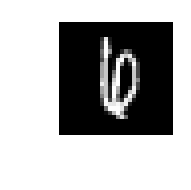

(0.0, 1.0, 0.0, 1.0)

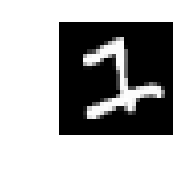

(0.0, 1.0, 0.0, 1.0)

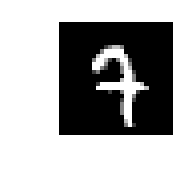

(0.0, 1.0, 0.0, 1.0)

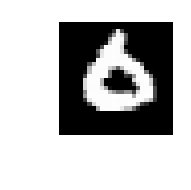

(0.0, 1.0, 0.0, 1.0)

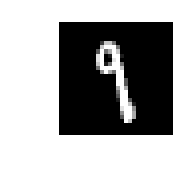

(0.0, 1.0, 0.0, 1.0)

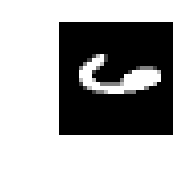

(0.0, 1.0, 0.0, 1.0)

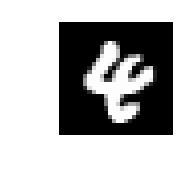

(0.0, 1.0, 0.0, 1.0)

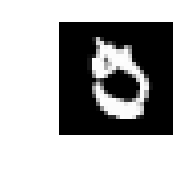

(0.0, 1.0, 0.0, 1.0)

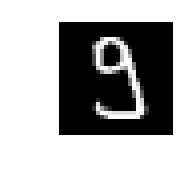

(0.0, 1.0, 0.0, 1.0)

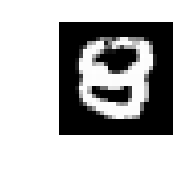

(0.0, 1.0, 0.0, 1.0)

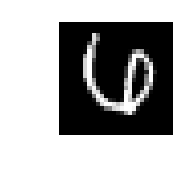

(0.0, 1.0, 0.0, 1.0)

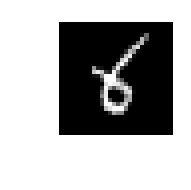

(0.0, 1.0, 0.0, 1.0)

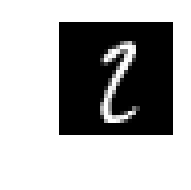

(0.0, 1.0, 0.0, 1.0)

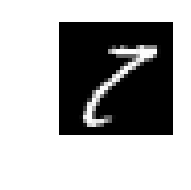

(0.0, 1.0, 0.0, 1.0)

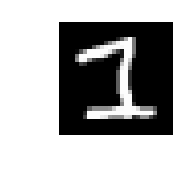

(0.0, 1.0, 0.0, 1.0)

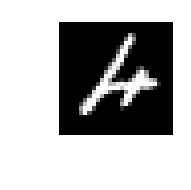

(0.0, 1.0, 0.0, 1.0)

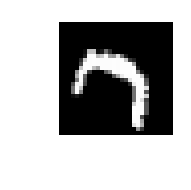

(0.0, 1.0, 0.0, 1.0)

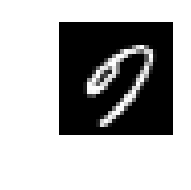

(0.0, 1.0, 0.0, 1.0)

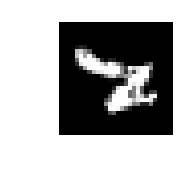

(0.0, 1.0, 0.0, 1.0)

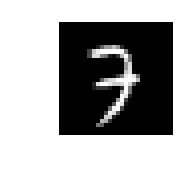

(0.0, 1.0, 0.0, 1.0)

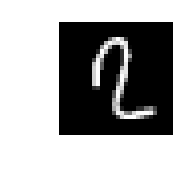

(0.0, 1.0, 0.0, 1.0)

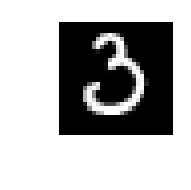

(0.0, 1.0, 0.0, 1.0)

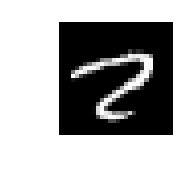

(0.0, 1.0, 0.0, 1.0)

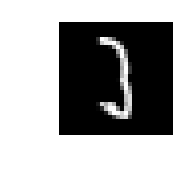

(0.0, 1.0, 0.0, 1.0)

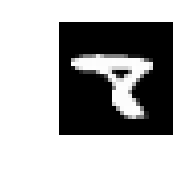

(0.0, 1.0, 0.0, 1.0)

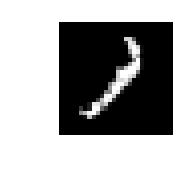

(0.0, 1.0, 0.0, 1.0)

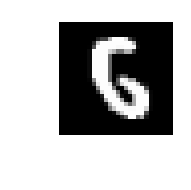

(0.0, 1.0, 0.0, 1.0)

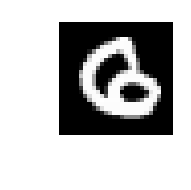

(0.0, 1.0, 0.0, 1.0)

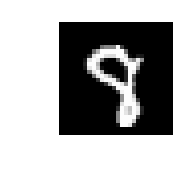

(0.0, 1.0, 0.0, 1.0)

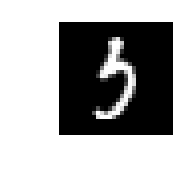

(0.0, 1.0, 0.0, 1.0)

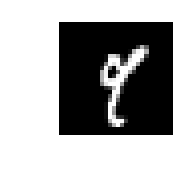

(0.0, 1.0, 0.0, 1.0)

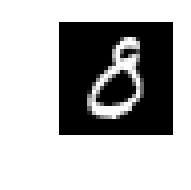

(0.0, 1.0, 0.0, 1.0)

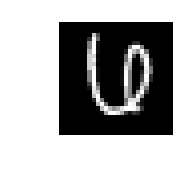

(0.0, 1.0, 0.0, 1.0)

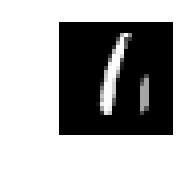

(0.0, 1.0, 0.0, 1.0)

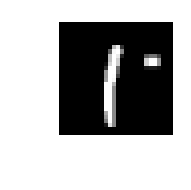

(0.0, 1.0, 0.0, 1.0)

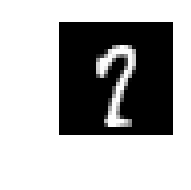

(0.0, 1.0, 0.0, 1.0)

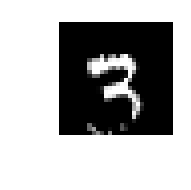

(0.0, 1.0, 0.0, 1.0)

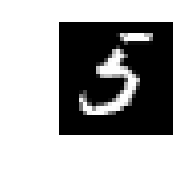

(0.0, 1.0, 0.0, 1.0)

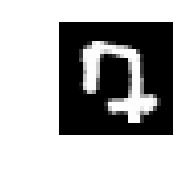

(0.0, 1.0, 0.0, 1.0)

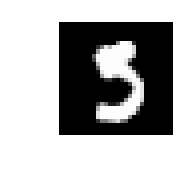

(0.0, 1.0, 0.0, 1.0)

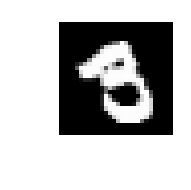

(0.0, 1.0, 0.0, 1.0)

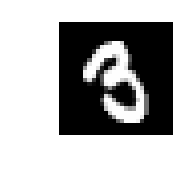

(0.0, 1.0, 0.0, 1.0)

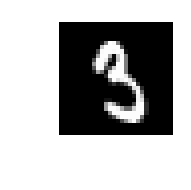

(0.0, 1.0, 0.0, 1.0)

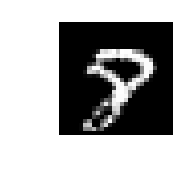

(0.0, 1.0, 0.0, 1.0)

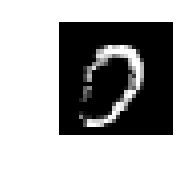

(0.0, 1.0, 0.0, 1.0)

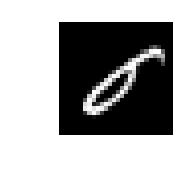

(0.0, 1.0, 0.0, 1.0)

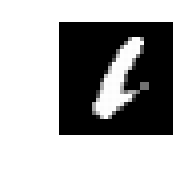

(0.0, 1.0, 0.0, 1.0)

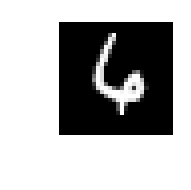

(0.0, 1.0, 0.0, 1.0)

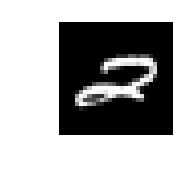

(0.0, 1.0, 0.0, 1.0)

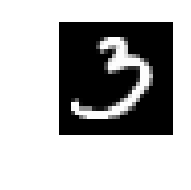

(0.0, 1.0, 0.0, 1.0)

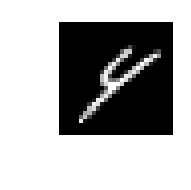

(0.0, 1.0, 0.0, 1.0)

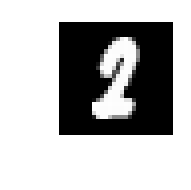

(0.0, 1.0, 0.0, 1.0)

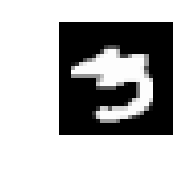

(0.0, 1.0, 0.0, 1.0)

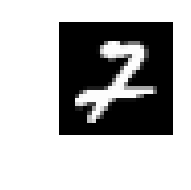

(0.0, 1.0, 0.0, 1.0)

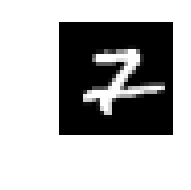

(0.0, 1.0, 0.0, 1.0)

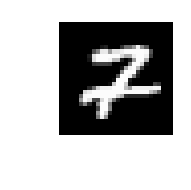

(0.0, 1.0, 0.0, 1.0)

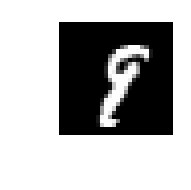

(0.0, 1.0, 0.0, 1.0)

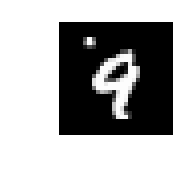

(0.0, 1.0, 0.0, 1.0)

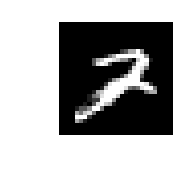

(0.0, 1.0, 0.0, 1.0)

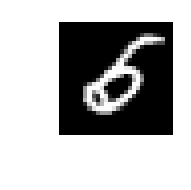

(0.0, 1.0, 0.0, 1.0)

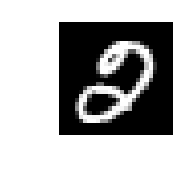

(0.0, 1.0, 0.0, 1.0)

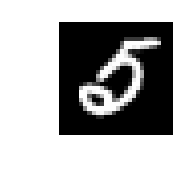

(0.0, 1.0, 0.0, 1.0)

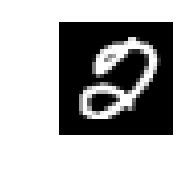

(0.0, 1.0, 0.0, 1.0)

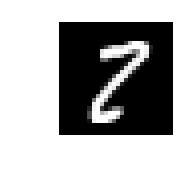

(0.0, 1.0, 0.0, 1.0)

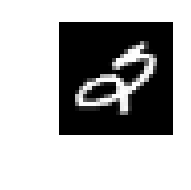

(0.0, 1.0, 0.0, 1.0)

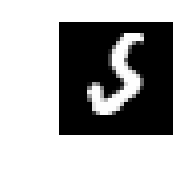

In [37]:
test_pred=cnn_model.predict_classes(x_test)
act_test_pred=ny_test
comp=list(test_pred==act_test_pred)
wrong_index=[i for i,x in enumerate(comp) if x==False]
wrong_pred=x_test[wrong_index]
print("number of wrong predictions",wrong_pred.shape[0])
for i in range(wrong_pred.shape[0]):
    x=wrong_pred[i]*255.0
    im=x.reshape(28,28)
    k=plt.figure(figsize=(1,1))
    k=plt.gray()
    plt.axis('off')
    k=plt.imshow(im,aspect=1)
    plt.show()

# DCNN

In [38]:
#deep convolutional network
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train=x_train/255.0
x_test=x_test/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [39]:
#validation set
val_train=x_train[40000:]
x_train=x_train[:40000]
val_test=y_train[40000:]
y_train=y_train[:40000]

In [40]:
dcnn_model = Sequential()
dcnn_model.add(Conv2D(30, (5, 5), input_shape=(28, 28,1), activation='relu'))
dcnn_model.add(MaxPooling2D(pool_size=(2, 2)))
dcnn_model.add(Conv2D(15, (3, 3), activation='relu'))
dcnn_model.add(MaxPooling2D(pool_size=(2, 2)))
dcnn_model.add(Dropout(0.2))
dcnn_model.add(Flatten())
dcnn_model.add(Dense(128, activation='relu'))
dcnn_model.add(Dense(50, activation='relu'))
dcnn_model.add(Dense(num_classes, activation='softmax'))
dcnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
dcnn_model.fit(x_train,y_train,validation_data=(val_train,val_test),epochs=10,batch_size=200,verbose=1)

Train on 40000 samples, validate on 20000 samples
Epoch 1/10
40000/40000 [==============================] - 36s - loss: 0.5640 - acc: 0.8236 - val_loss: 0.1368 - val_acc: 0.9599
Epoch 2/10
40000/40000 [==============================] - 36s - loss: 0.1345 - acc: 0.9590 - val_loss: 0.0906 - val_acc: 0.9723
Epoch 3/10
40000/40000 [==============================] - 36s - loss: 0.0917 - acc: 0.9721 - val_loss: 0.0698 - val_acc: 0.9794
Epoch 4/10
40000/40000 [==============================] - 36s - loss: 0.0720 - acc: 0.9779 - val_loss: 0.0584 - val_acc: 0.9829
Epoch 5/10
40000/40000 [==============================] - 36s - loss: 0.0633 - acc: 0.9807 - val_loss: 0.0507 - val_acc: 0.9852
Epoch 6/10
40000/40000 [==============================] - 36s - loss: 0.0537 - acc: 0.9831 - val_loss: 0.0500 - val_acc: 0.9864
Epoch 7/10
40000/40000 [==============================] - 36s - loss: 0.0464 - acc: 0.9859 - val_loss: 0.0488 - val_acc: 0.9859
Epoch 8/10
40000/40000 [==============================

In [42]:
dcnn_model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s     


[0.034389922928315352, 0.98899999999999999]

 9888/10000 [============================>.] - ETA: 0s('number of wrong predictions', 110)


(0.0, 1.0, 0.0, 1.0)

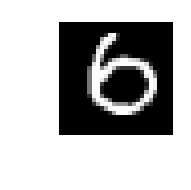

(0.0, 1.0, 0.0, 1.0)

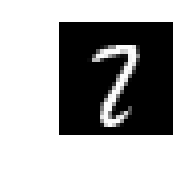

(0.0, 1.0, 0.0, 1.0)

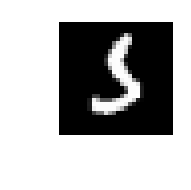

(0.0, 1.0, 0.0, 1.0)

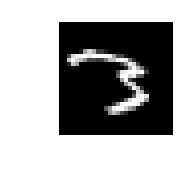

(0.0, 1.0, 0.0, 1.0)

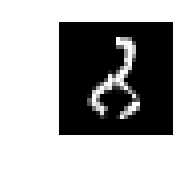

(0.0, 1.0, 0.0, 1.0)

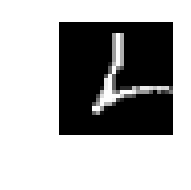

(0.0, 1.0, 0.0, 1.0)

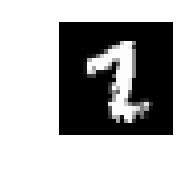

(0.0, 1.0, 0.0, 1.0)

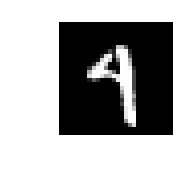

(0.0, 1.0, 0.0, 1.0)

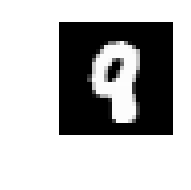

(0.0, 1.0, 0.0, 1.0)

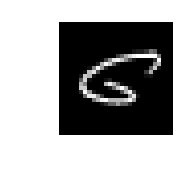

(0.0, 1.0, 0.0, 1.0)

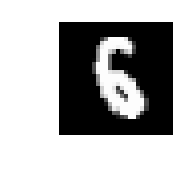

(0.0, 1.0, 0.0, 1.0)

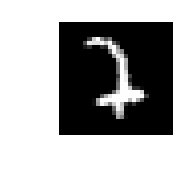

(0.0, 1.0, 0.0, 1.0)

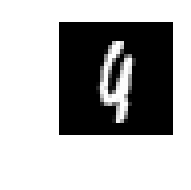

(0.0, 1.0, 0.0, 1.0)

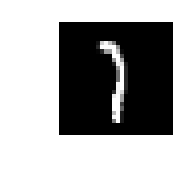

(0.0, 1.0, 0.0, 1.0)

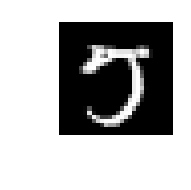

(0.0, 1.0, 0.0, 1.0)

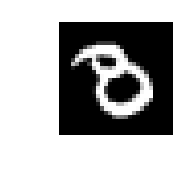

(0.0, 1.0, 0.0, 1.0)

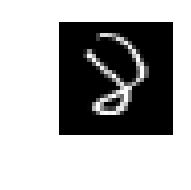

(0.0, 1.0, 0.0, 1.0)

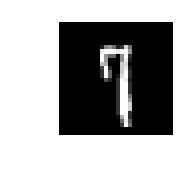

(0.0, 1.0, 0.0, 1.0)

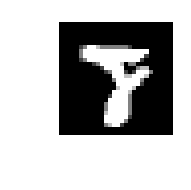

(0.0, 1.0, 0.0, 1.0)

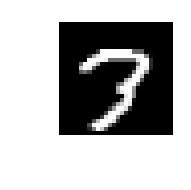

(0.0, 1.0, 0.0, 1.0)

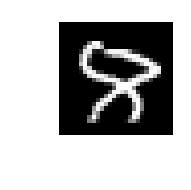

(0.0, 1.0, 0.0, 1.0)

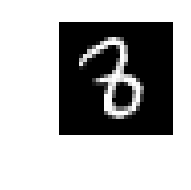

(0.0, 1.0, 0.0, 1.0)

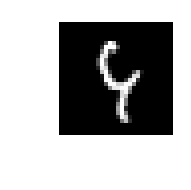

(0.0, 1.0, 0.0, 1.0)

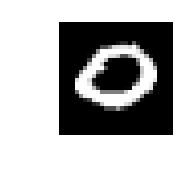

(0.0, 1.0, 0.0, 1.0)

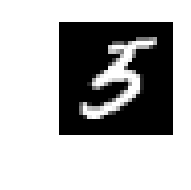

(0.0, 1.0, 0.0, 1.0)

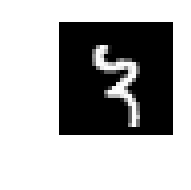

(0.0, 1.0, 0.0, 1.0)

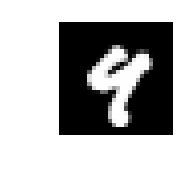

(0.0, 1.0, 0.0, 1.0)

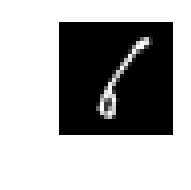

(0.0, 1.0, 0.0, 1.0)

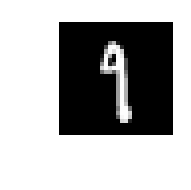

(0.0, 1.0, 0.0, 1.0)

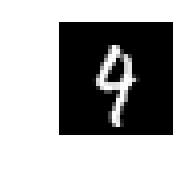

(0.0, 1.0, 0.0, 1.0)

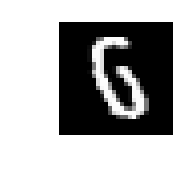

(0.0, 1.0, 0.0, 1.0)

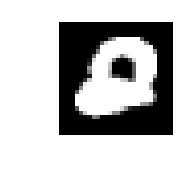

(0.0, 1.0, 0.0, 1.0)

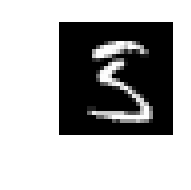

(0.0, 1.0, 0.0, 1.0)

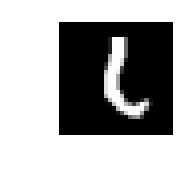

(0.0, 1.0, 0.0, 1.0)

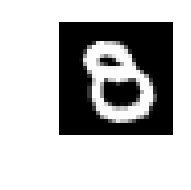

(0.0, 1.0, 0.0, 1.0)

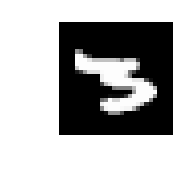

(0.0, 1.0, 0.0, 1.0)

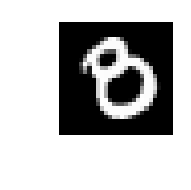

(0.0, 1.0, 0.0, 1.0)

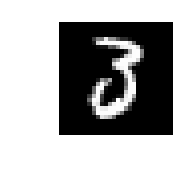

(0.0, 1.0, 0.0, 1.0)

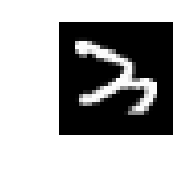

(0.0, 1.0, 0.0, 1.0)

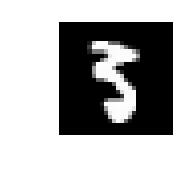

(0.0, 1.0, 0.0, 1.0)

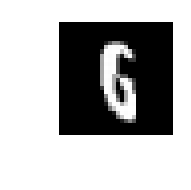

(0.0, 1.0, 0.0, 1.0)

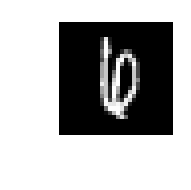

(0.0, 1.0, 0.0, 1.0)

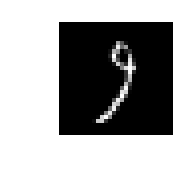

(0.0, 1.0, 0.0, 1.0)

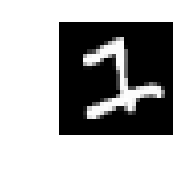

(0.0, 1.0, 0.0, 1.0)

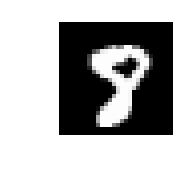

(0.0, 1.0, 0.0, 1.0)

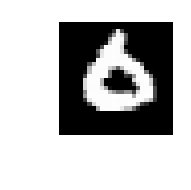

(0.0, 1.0, 0.0, 1.0)

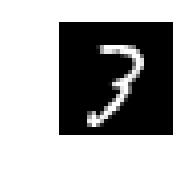

(0.0, 1.0, 0.0, 1.0)

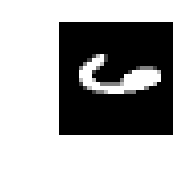

(0.0, 1.0, 0.0, 1.0)

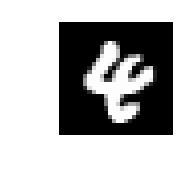

(0.0, 1.0, 0.0, 1.0)

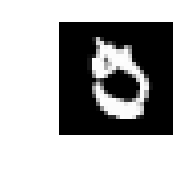

(0.0, 1.0, 0.0, 1.0)

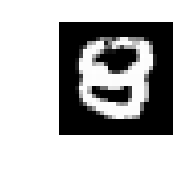

(0.0, 1.0, 0.0, 1.0)

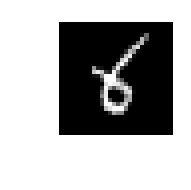

(0.0, 1.0, 0.0, 1.0)

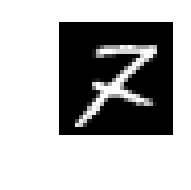

(0.0, 1.0, 0.0, 1.0)

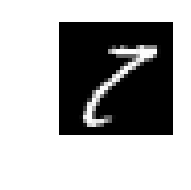

(0.0, 1.0, 0.0, 1.0)

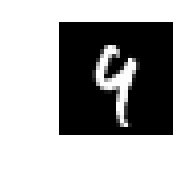

(0.0, 1.0, 0.0, 1.0)

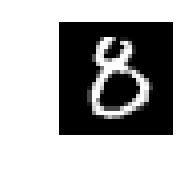

(0.0, 1.0, 0.0, 1.0)

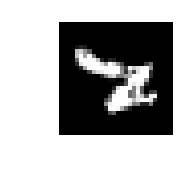

(0.0, 1.0, 0.0, 1.0)

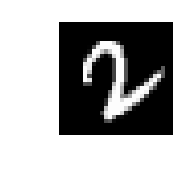

(0.0, 1.0, 0.0, 1.0)

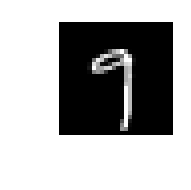

(0.0, 1.0, 0.0, 1.0)

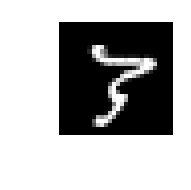

(0.0, 1.0, 0.0, 1.0)

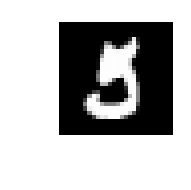

(0.0, 1.0, 0.0, 1.0)

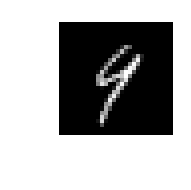

(0.0, 1.0, 0.0, 1.0)

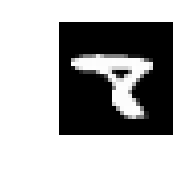

(0.0, 1.0, 0.0, 1.0)

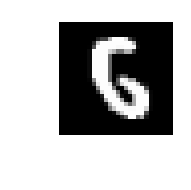

(0.0, 1.0, 0.0, 1.0)

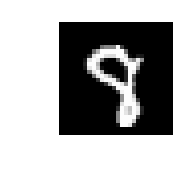

(0.0, 1.0, 0.0, 1.0)

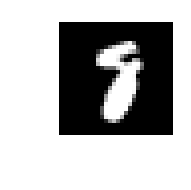

(0.0, 1.0, 0.0, 1.0)

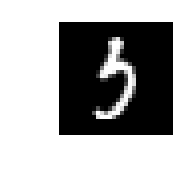

(0.0, 1.0, 0.0, 1.0)

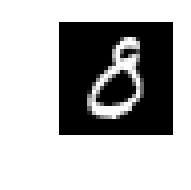

(0.0, 1.0, 0.0, 1.0)

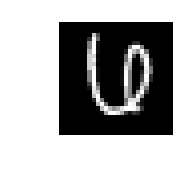

(0.0, 1.0, 0.0, 1.0)

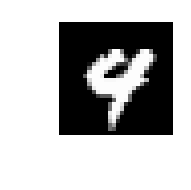

(0.0, 1.0, 0.0, 1.0)

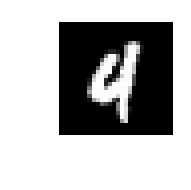

(0.0, 1.0, 0.0, 1.0)

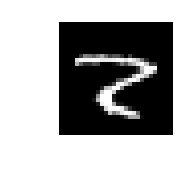

(0.0, 1.0, 0.0, 1.0)

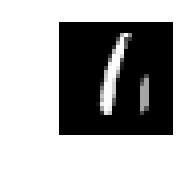

(0.0, 1.0, 0.0, 1.0)

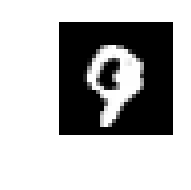

(0.0, 1.0, 0.0, 1.0)

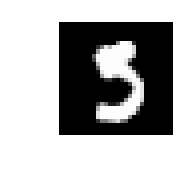

(0.0, 1.0, 0.0, 1.0)

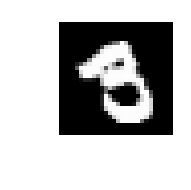

(0.0, 1.0, 0.0, 1.0)

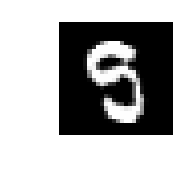

(0.0, 1.0, 0.0, 1.0)

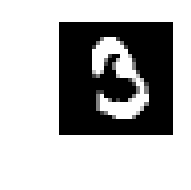

(0.0, 1.0, 0.0, 1.0)

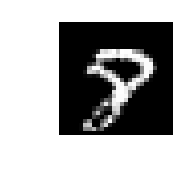

(0.0, 1.0, 0.0, 1.0)

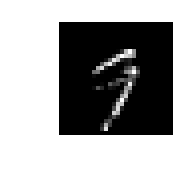

(0.0, 1.0, 0.0, 1.0)

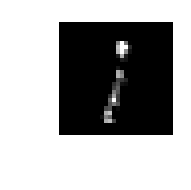

(0.0, 1.0, 0.0, 1.0)

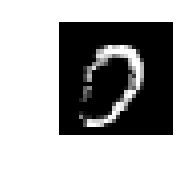

(0.0, 1.0, 0.0, 1.0)

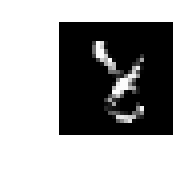

(0.0, 1.0, 0.0, 1.0)

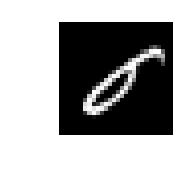

(0.0, 1.0, 0.0, 1.0)

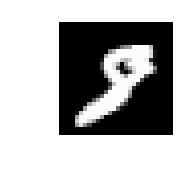

(0.0, 1.0, 0.0, 1.0)

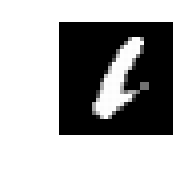

(0.0, 1.0, 0.0, 1.0)

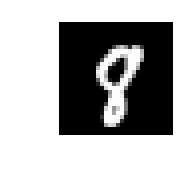

(0.0, 1.0, 0.0, 1.0)

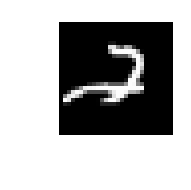

(0.0, 1.0, 0.0, 1.0)

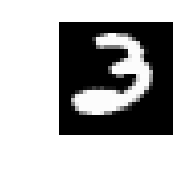

(0.0, 1.0, 0.0, 1.0)

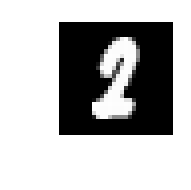

(0.0, 1.0, 0.0, 1.0)

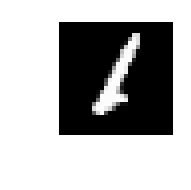

(0.0, 1.0, 0.0, 1.0)

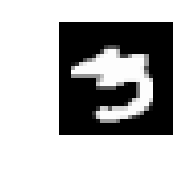

(0.0, 1.0, 0.0, 1.0)

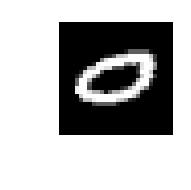

(0.0, 1.0, 0.0, 1.0)

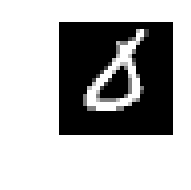

(0.0, 1.0, 0.0, 1.0)

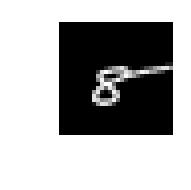

(0.0, 1.0, 0.0, 1.0)

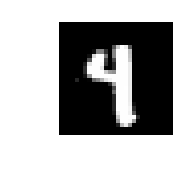

(0.0, 1.0, 0.0, 1.0)

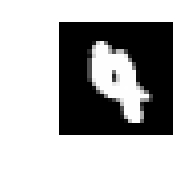

(0.0, 1.0, 0.0, 1.0)

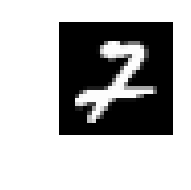

(0.0, 1.0, 0.0, 1.0)

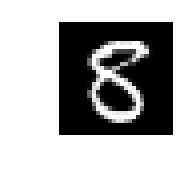

(0.0, 1.0, 0.0, 1.0)

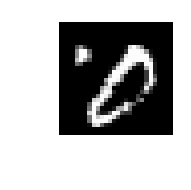

(0.0, 1.0, 0.0, 1.0)

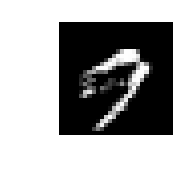

(0.0, 1.0, 0.0, 1.0)

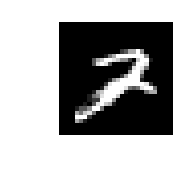

(0.0, 1.0, 0.0, 1.0)

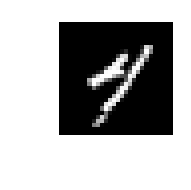

(0.0, 1.0, 0.0, 1.0)

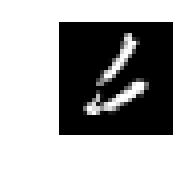

(0.0, 1.0, 0.0, 1.0)

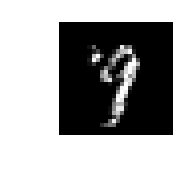

(0.0, 1.0, 0.0, 1.0)

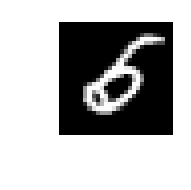

(0.0, 1.0, 0.0, 1.0)

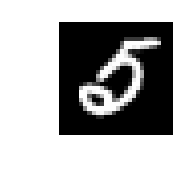

(0.0, 1.0, 0.0, 1.0)

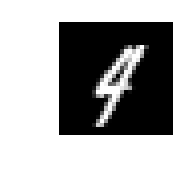

(0.0, 1.0, 0.0, 1.0)

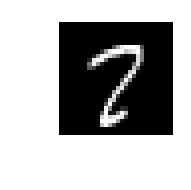

(0.0, 1.0, 0.0, 1.0)

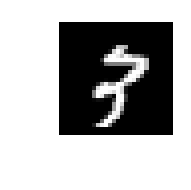

In [43]:
test_pred=dcnn_model.predict_classes(x_test)
act_test_pred=ny_test
comp=list(test_pred==act_test_pred)
wrong_index=[i for i,x in enumerate(comp) if x==False]
wrong_pred=x_test[wrong_index]
print("number of wrong predictions",wrong_pred.shape[0])
for i in range(wrong_pred.shape[0]):
    x=wrong_pred[i]*255.0
    im=x.reshape(28,28)
    k=plt.figure(figsize=(1,1))
    k=plt.gray()
    plt.axis('off')
    k=plt.imshow(im,aspect=1)
    plt.show()

# Data Augmentation

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0],28, 28,1)
x_train=x_train/255.0
x_test=x_test/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [47]:
from keras.layers.normalization import BatchNormalization

In [52]:
dcnn_model=Sequential()
dcnn_model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu'))
BatchNormalization(axis=1)
dcnn_model.add(Conv2D(32, (3, 3),activation='relu'))
dcnn_model.add(MaxPooling2D(pool_size=(2,2)))
BatchNormalization(axis=1)
dcnn_model.add(Conv2D(64,(3, 3),activation='relu'))
BatchNormalization(axis=1)
dcnn_model.add(Conv2D(64, (3, 3),activation='relu'))
dcnn_model.add(MaxPooling2D(pool_size=(2,2)))
dcnn_model.add(Flatten())
BatchNormalization()
dcnn_model.add(Dense(512,activation='relu'))
BatchNormalization()
dcnn_model.add(Dropout(0.2))
dcnn_model.add(Dense(10,activation='softmax'))
dcnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
from keras.preprocessing.image import ImageDataGenerator

In [55]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [62]:
dcnn_model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=6,validation_data=test_generator, validation_steps=10000//64)

Epoch 1/6
937/937 [==============================] - 234s - loss: 0.0266 - acc: 0.9918 - val_loss: 0.0159 - val_acc: 0.9958
Epoch 2/6
937/937 [==============================] - 225s - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0151 - val_acc: 0.9947
Epoch 3/6
937/937 [==============================] - 225s - loss: 0.0247 - acc: 0.9923 - val_loss: 0.0173 - val_acc: 0.9949
Epoch 4/6
937/937 [==============================] - 233s - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0164 - val_acc: 0.9950
Epoch 5/6
937/937 [==============================] - 229s - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0193 - val_acc: 0.9943
Epoch 6/6
937/937 [==============================] - 228s - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0189 - val_acc: 0.9950


In [64]:
scores=dcnn_model.evaluate(x_test,y_test)
print "accuracy",scores[1]

 9984/10000 [============================>.] - ETA: 0saccuracy 0.9951


10000/10000 [==============================] - 11s    
('number of wrong predictions', 49)


(0.0, 1.0, 0.0, 1.0)

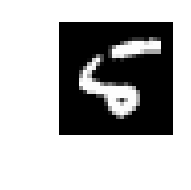

(0.0, 1.0, 0.0, 1.0)

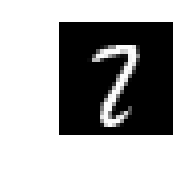

(0.0, 1.0, 0.0, 1.0)

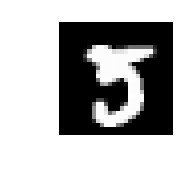

(0.0, 1.0, 0.0, 1.0)

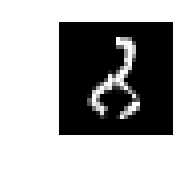

(0.0, 1.0, 0.0, 1.0)

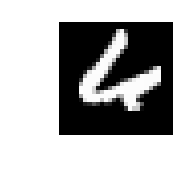

(0.0, 1.0, 0.0, 1.0)

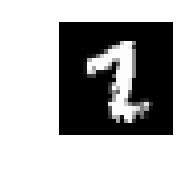

(0.0, 1.0, 0.0, 1.0)

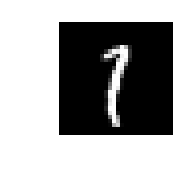

(0.0, 1.0, 0.0, 1.0)

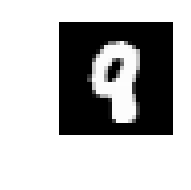

(0.0, 1.0, 0.0, 1.0)

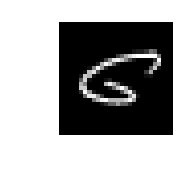

(0.0, 1.0, 0.0, 1.0)

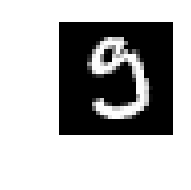

(0.0, 1.0, 0.0, 1.0)

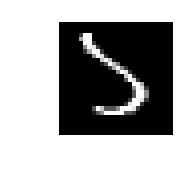

(0.0, 1.0, 0.0, 1.0)

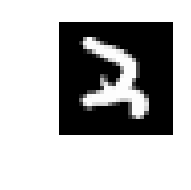

(0.0, 1.0, 0.0, 1.0)

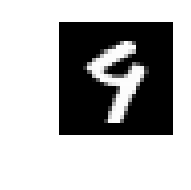

(0.0, 1.0, 0.0, 1.0)

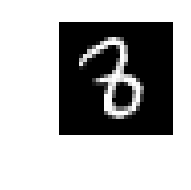

(0.0, 1.0, 0.0, 1.0)

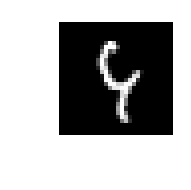

(0.0, 1.0, 0.0, 1.0)

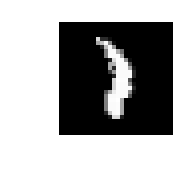

(0.0, 1.0, 0.0, 1.0)

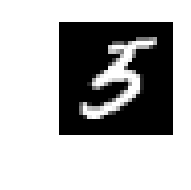

(0.0, 1.0, 0.0, 1.0)

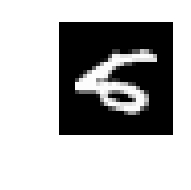

(0.0, 1.0, 0.0, 1.0)

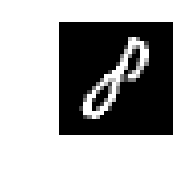

(0.0, 1.0, 0.0, 1.0)

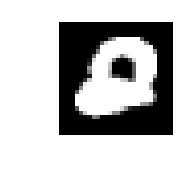

(0.0, 1.0, 0.0, 1.0)

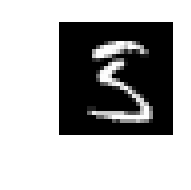

(0.0, 1.0, 0.0, 1.0)

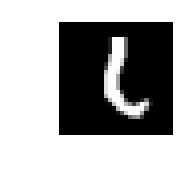

(0.0, 1.0, 0.0, 1.0)

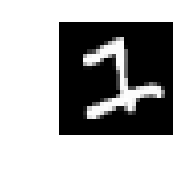

(0.0, 1.0, 0.0, 1.0)

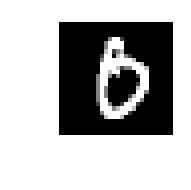

(0.0, 1.0, 0.0, 1.0)

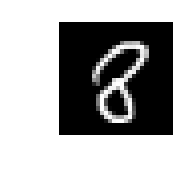

(0.0, 1.0, 0.0, 1.0)

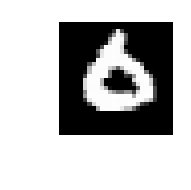

(0.0, 1.0, 0.0, 1.0)

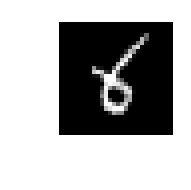

(0.0, 1.0, 0.0, 1.0)

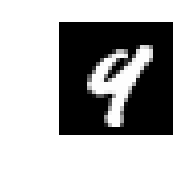

(0.0, 1.0, 0.0, 1.0)

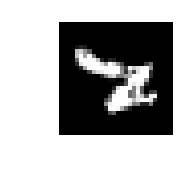

(0.0, 1.0, 0.0, 1.0)

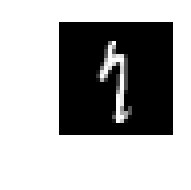

(0.0, 1.0, 0.0, 1.0)

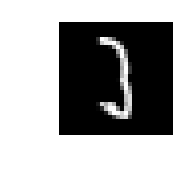

(0.0, 1.0, 0.0, 1.0)

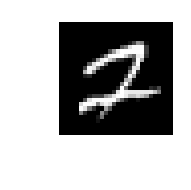

(0.0, 1.0, 0.0, 1.0)

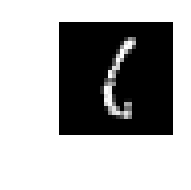

(0.0, 1.0, 0.0, 1.0)

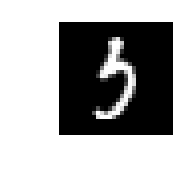

(0.0, 1.0, 0.0, 1.0)

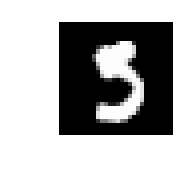

(0.0, 1.0, 0.0, 1.0)

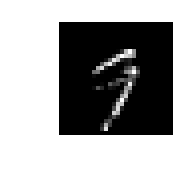

(0.0, 1.0, 0.0, 1.0)

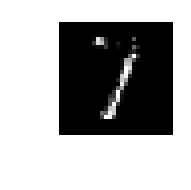

(0.0, 1.0, 0.0, 1.0)

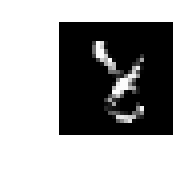

(0.0, 1.0, 0.0, 1.0)

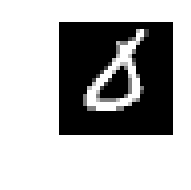

(0.0, 1.0, 0.0, 1.0)

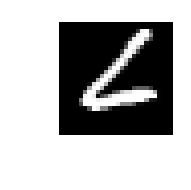

(0.0, 1.0, 0.0, 1.0)

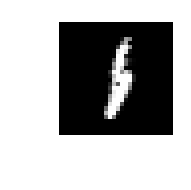

(0.0, 1.0, 0.0, 1.0)

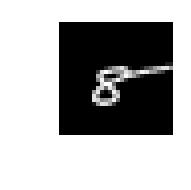

(0.0, 1.0, 0.0, 1.0)

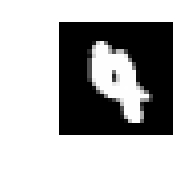

(0.0, 1.0, 0.0, 1.0)

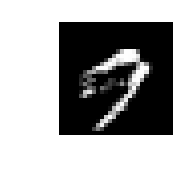

(0.0, 1.0, 0.0, 1.0)

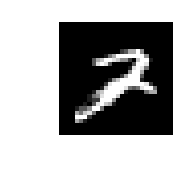

(0.0, 1.0, 0.0, 1.0)

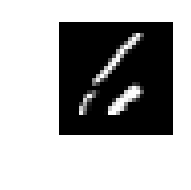

(0.0, 1.0, 0.0, 1.0)

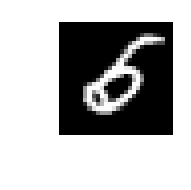

(0.0, 1.0, 0.0, 1.0)

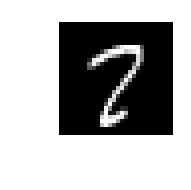

(0.0, 1.0, 0.0, 1.0)

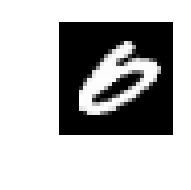

In [63]:
test_pred=dcnn_model.predict_classes(x_test)
act_test_pred=ny_test
comp=list(test_pred==act_test_pred)
wrong_index=[i for i,x in enumerate(comp) if x==False]
wrong_pred=x_test[wrong_index]
print("number of wrong predictions",wrong_pred.shape[0])
for i in range(wrong_pred.shape[0]):
    x=wrong_pred[i]*255.0
    im=x.reshape(28,28)
    k=plt.figure(figsize=(1,1))
    k=plt.gray()
    plt.axis('off')
    k=plt.imshow(im,aspect=1)
    plt.show()